# Proyek Analisis Data: E-Commerce Public Dataset

- **Nama:** Firdaus Arif Ramadhani
- **Email:** firdausarief65@gmail.com
- **ID Dicoding:** 2VX3464E3ZYQ

## Menentukan Pertanyaan Bisnis

1. Apa faktor utama yang menyebabkan pembatalan pesanan?
2. Bagaimana pengaruh interval pengiriman terhadap tingkat kepuasan pelanggan?
3. Kategori produk apa yang paling populer berdasarkan jumlah ulasan?
4. Bagaimana performa berbagai kategori produk dalam hal kepuasan pelanggan?
5. Bagaimana tren penjualan bulanan?

## Import Semua Packages/Library yang Digunakan


In [2]:
import random
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
from deep_translator import GoogleTranslator as Translator
from wordcloud import WordCloud

## Data Wrangling


### Gathering Data


#### Data Tabel `products_df`


In [3]:
products_df = pd.read_csv(
    "https://media.githubusercontent.com/media/fxrdhan/Data-Analytics-Project/refs/heads/main/e-commerce_public_dataset/products_dataset.csv"
)
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**\
Dataset products_df berisi informasi terkait produk.\
Informasi yang tersedia diantaranya:

1. `product_id`: ID unik untuk setiap produk.
2. `product_category_name`: Panjang nama produk dalam karakter.
3. `product_name_lenght`: Panjang deskripsi produk.
4. `product_photos_qty`: Jumlah foto yang tersedia untuk produk.
5. `product_weight_g`: Berat produk.
6. `product_length_cm`, `product_height_cm`, dan `product_width_cm`: DImensi produk.


#### Data Tabel `product_category_translation_df`


In [4]:
product_category_translation_df = pd.read_csv(
    "https://media.githubusercontent.com/media/fxrdhan/Data-Analytics-Project/refs/heads/main/e-commerce_public_dataset/product_category_name_translation.csv"
)
product_category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**\
Dataset `product_category_translation_df` memuat terjemahan nama kategori produk dari bahasa Portugis ke bahasa Inggris.\
Informasi yang tertera diantaranya:

1. `product_category_name`: Nama kategori dalam bahasa Portugis.
2. `product_category_name_english`: Nama kategori dalam bahasa Inggris.


#### Data Tabel `order_reviews_df`


In [261]:
order_reviews_df = pd.read_csv(
    "https://media.githubusercontent.com/media/fxrdhan/Data-Analytics-Project/refs/heads/main/e-commerce_public_dataset/order_reviews_dataset.csv"
)
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:**\
Dataset `order_reviews_df` berisi informasi mengenai ulasan pelanggan terhadap pesanan yang telah mereka terima.\
Informasi yang tertera diantaranya:

1. `review_id`: ID unik untuk setiap ulasan.
2. `order_id`: ID unik dari pesanan.
3. `review_score`: Skor ulasan yang diberikan oleh pelanggan, pada skala 1-5.
4. `review_comment_title` & `review_comment_message`: Komentar pelanggan.
5. `review_creation_date` $ `review_answer_timestamp`: Waktu ketika ulasan dibuat dan dijawab.


#### Data Tabel `order_payments`


In [5]:
order_payments_df = pd.read_csv(
    "https://media.githubusercontent.com/media/fxrdhan/Data-Analytics-Project/refs/heads/main/e-commerce_public_dataset/order_payments_dataset.csv"
)
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**\
Dataset `order_payments` ini berisi informasi mengenai pembayaran yang dilakukan pelanggan untuk pesanan yang mereka buat.\
Informasi yang tertera diantaranya:

1. `order_id`: ID unik untuk setiap pesanan.
2. `payment_sequential`: Urutan pembayaran untuk setiap pesanan.
3. `payment_type`: Jenis pembayaran yang digunakan oleh pelanggan.
4. `payment_installments`: Jumlah cicilan yang diambil oleh pelanggan untuk membayar pesanan.
5. `payment_value`: Nilai total dari setiap pembayaran.


#### Data Tabel `order_items_df`


In [263]:
order_items_df = pd.read_csv(
    "https://media.githubusercontent.com/media/fxrdhan/Data-Analytics-Project/refs/heads/main/e-commerce_public_dataset/order_items_dataset.csv"
)
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**\
Dataset `order_items_df` berisi informasi mengenai item yang dipesan dalam setiap pesanan.\
Informasi yang tertera diantaranya:

1. `order_id`: ID unik untuk setiap pesanan.
2. `order_item_id`: ID untuk setiap item pesanan dalam pesanan yang sama.
3. `product_id`: ID produk yang dipesan.
4. `seller_id`: ID unik penjual.
5. `shipping_limit_date`: Batas waktu pengiriman item oleh penjual.
6. `price`: Harga jual produk yang dipesan.
7. `freight_value`: Biaya pengiriman item.


#### Data Tabel `geolocation_df`


In [264]:
geolocation_df = pd.read_csv(
    "https://media.githubusercontent.com/media/fxrdhan/Data-Analytics-Project/refs/heads/main/e-commerce_public_dataset/geolocation_dataset.csv"
)
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**\
Dataset `geolocation_df` berisi informasi geolokasi.\
Informasi yang tertera diantaranya:

1. `geolocation_zip_code_prefix`: Kode pos.
2. `geolocation_lat`: Koordinat geografis lintang.
3. `geolocation_lng`: Koordinat geografis bujur.
4. `geolocation_city`: Nama kota.
5. `geolocation_state`: Nama negara bagian.


#### Data Tabel `customers_df`


In [6]:
customers_df = pd.read_csv("https://media.githubusercontent.com/media/fxrdhan/Data-Analytics-Project/refs/heads/main/e-commerce_public_dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**\
Dataset `customers_df` berisi informasi mengenai pelanggan yang melakukan pemesanan.\
Informasi yang tertera diantaranya:

1. `customer_id`: ID pelanggan untuk setiap pesanan.
2. `customer_unique_id`: ID unik pelanggan.
3. `customer_zip_code_prefix`: Kode pos pelanggan.
4. `customer_city`: Nama kota pelanggan.
5. `customer_state`: Nama negara bagian pelanggan.


#### Data Tabel `sellers_df`


In [7]:
sellers_df = pd.read_csv(
    "https://media.githubusercontent.com/media/fxrdhan/Data-Analytics-Project/refs/heads/main/e-commerce_public_dataset/sellers_dataset.csv"
)
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**\
Dataset `sellers_df` berisi informasi penjual\
Informasi yang tertera diantaranya:

1. `seller_id`: ID penjual.
2. `seller_zip_code_prefix`: Kode pos penjual.
3. `seller_city`: Nama kota penjual.
4. `seller_state`: Nama negara bagian penjual.


#### Data Tabel `orders_df`


In [8]:
orders_df = pd.read_csv(
    "https://media.githubusercontent.com/media/fxrdhan/Data-Analytics-Project/refs/heads/main/e-commerce_public_dataset/orders_dataset.csv"
)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**\
Dataset `orders_df` berisi informasi mengenai pesanan yang dibuat oleh pelanggan.\
Informasi yang tertera diantaranya:

1. `order_id`: ID unik untuk setiap pesanan.
2. `customer_id`: ID pelanggan yang terkait dengan pesanan.
3. `order_status`: Status pesanan yang menunjukkan tahapan pesanan seperti delivered, shipped, canceled, dll.
4. `order_purchase_timestamp`: Tanggal dan waktu pesanan dibuat.
5. `order_approved_at`: Waktu persetujuan pesanan.
6. `order_delivered_carrier_date`: Tanggal pesanan dikirim ke pelanggan oleh kurir.
7. `order_delivered_customer_date`: Tanggal pesanan diterima oleh pelanggan.
8. `order_estimated_delivery_date`: Estimasi tanggal pengiriman pesanan.


### Assessing Data


#### Menilai Tabel `products_df`


In [268]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [269]:
print("\nMissing values in Products dataset:")
products_df.isna().sum()


Missing values in Products dataset:


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [270]:
print("Duplicates in Products dataset:", products_df.duplicated().sum())

Duplicates in Products dataset: 0


In [271]:
products_df["product_weight_g"].describe().round(2)

count    32949.00
mean      2276.47
std       4282.04
min          0.00
25%        300.00
50%        700.00
75%       1900.00
max      40425.00
Name: product_weight_g, dtype: float64

**Insight:**\
Tidak ada data duplikat.\
Terdapat beberapa kolom memiliki nilai yang hilang.\
Rentang nilai `product_weight_g` cukup besar, mulai dari **0.00** hingga **40425** gram, yang menunjukkan adanya anomali pada nilai minimum. Nilai **0.00** pada berat produk tampak tidak logis.


#### Menilai Tabel `product_category_translation_df`


In [272]:
product_category_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [273]:
print("\nMissing values in Product Category Translation dataset:")
product_category_translation_df.isna().sum()


Missing values in Product Category Translation dataset:


product_category_name            0
product_category_name_english    0
dtype: int64

In [274]:
print(
    "Duplicates in Product Category Translation dataset:",
    product_category_translation_df.duplicated().sum(),
)

Duplicates in Product Category Translation dataset: 0


**Insight:**\
Setiap kategori produk dalam bahasa Portugis dan terjemahan bahasa Inggris, sesuai dengan jumlah total entri **(71)**.\
Tidak memiliki nilai yang hilang atau duplikat.


#### Menilai Tabel `order_reviews_df`


In [275]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [276]:
print("\nMissing values in Order Reviews dataset:")
order_reviews_df.isna().sum()


Missing values in Order Reviews dataset:


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [277]:
print("Duplicates in Order Reviews dataset:", order_reviews_df.duplicated().sum())

Duplicates in Order Reviews dataset: 0


**Insight:**\
Anomali pada kolom `review_creation_date` & `review_answer_timestamp` yang bertipe data _object_ (teks).
Terdapat banyak nilai yang hilang pada entri `review_comment_title` dan `review_comment_message`.\
Tidak ada baris yang duplikat.\


#### Menilai Tabel `order_payments_df`


In [278]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [279]:
print("\nMissing values in Order Payments dataset:")
order_payments_df.isna().sum()


Missing values in Order Payments dataset:


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [280]:
print("Duplicates in Order Payments dataset:", order_payments_df.duplicated().sum())

Duplicates in Order Payments dataset: 0


In [281]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**\
Tidak ada _missing values_.\
Tidak ada data duplikat.\
Pada kolom `payment_installments` dengan minimum value **0.00**, yang mungkin menunjukkan pembayaran tanpa cicilan.\
Pada kolom `payment_value`, nilai minimum adalah **0.00**, yang mungkin barang tersebut digratiskan atau sedang promo.


#### Menilai Tabel `order_items_df`


In [282]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [283]:
print("\nMissing values in Order Items dataset:")
order_items_df.isna().sum()


Missing values in Order Items dataset:


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [284]:
print("Duplicates in Order Items dataset:", order_items_df.duplicated().sum())

Duplicates in Order Items dataset: 0


**Insight:**\
Anomali pada kolom `shipping_limit_date` yang bertipe data _object_ (teks).\
Tidak ada _missing values_.\
Tidak ada baris yang duplikat.


#### Menilai Tabel `geolocation_df`


In [285]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [286]:
print("\nMissing values in Geolocation dataset:")
geolocation_df.isna().sum()


Missing values in Geolocation dataset:


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [287]:
print("Duplicates in Geolocation dataset:", geolocation_df.duplicated().sum())

Duplicates in Geolocation dataset: 261831


**Insight:**\
Tidak ada _missing values_.\
Terdapat **261831** baris duplikat, sekitar **26%** dari keseluruhan data.


#### Menilai Tabel `customers_df`


In [288]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [289]:
print("\nMissing values in Customers dataset:")
customers_df.isna().sum()


Missing values in Customers dataset:


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [290]:
print("Duplicates in Customers dataset:", customers_df.duplicated().sum())

Duplicates in Customers dataset: 0


**Insight:**\
Tidak ada anomali tipe data.\
Tidak ada _missing values_.\
Tidak ada baris yang duplikat.


#### Menilai Tabel `sellers_df`


In [291]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [292]:
print("\nMissing values in Sellers dataset:")
sellers_df.isna().sum()


Missing values in Sellers dataset:


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [293]:
print("Duplicates in Sellers dataset:", sellers_df.duplicated().sum())

Duplicates in Sellers dataset: 0


**Insight:**\
Tidak ada anomali tipe data.\
Tidak ada _missing values._\
Tidak ada bairs yang duplikat.


#### Menilai Tabel `orders_df`


In [294]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [295]:
print("Duplicates in Orders dataset:", orders_df.duplicated().sum())

Duplicates in Orders dataset: 0


In [296]:
print("\nMissing values in Orders dataset:")
orders_df.isna().sum()


Missing values in Orders dataset:


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Insight:**\
Anomali pada kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` dengan tipe data _object_ (teks).\
Tidak ada baris yang duplikat.\
Nilai-nilai yang hilang pada dataset berkaitan dengan tahapan proses pesanan, yang bisa disebabkan oleh pesanan yang belum selesai atau pembatalan.\


### Cleaning Data


#### Membersihkan Tabel `products_df`


In [297]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**FIXING:** Missing Values


In [298]:
print("\nMissing values in Products dataset:")
products_df.isna().sum()


Missing values in Products dataset:


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [299]:
missing_values = products_df[products_df.isna().any(axis=1)]
missing_values.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [300]:
products_df.loc[:, "product_category_name"] = products_df[
    "product_category_name"
].fillna("unknown")

In [301]:
unknown_count = products_df[products_df["product_category_name"] == "unknown"].shape[0]
print(
    f"Number of rows with 'unknown' entries in 'product_category_name': {unknown_count}"
)

Number of rows with 'unknown' entries in 'product_category_name': 610


In [302]:
print("Product weight statistics:\n")
products_df["product_weight_g"].describe().round(2)

Product weight statistics:



count    32949.00
mean      2276.47
std       4282.04
min          0.00
25%        300.00
50%        700.00
75%       1900.00
max      40425.00
Name: product_weight_g, dtype: float64

In [303]:
products_df.loc[
    products_df["product_weight_g"] == 0,
    ["product_id", "product_category_name", "product_weight_g"],
]

,product_id,product_category_name,product_weight_g
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,0.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,0.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,0.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,0.0


In [304]:
cama_mesa_banho_df = products_df[
    products_df["product_category_name"] == "cama_mesa_banho"
]

products_df.loc[
    (products_df["product_category_name"] == "cama_mesa_banho")
    & (products_df["product_weight_g"] == 0),
    "product_weight_g",
] = cama_mesa_banho_df["product_weight_g"].median()

In [305]:
print("Product weight statistics:\n")
products_df["product_weight_g"].describe().round(2)

Product weight statistics:



count    32949.00
mean      2276.62
std       4281.98
min          2.00
25%        300.00
50%        700.00
75%       1900.00
max      40425.00
Name: product_weight_g, dtype: float64

In [306]:
products_df["product_name_lenght"] = products_df["product_name_lenght"].fillna(
    products_df["product_name_lenght"].mean().round(2)
)

products_df["product_description_lenght"] = products_df[
    "product_description_lenght"
].fillna(products_df["product_description_lenght"].mean().round(2))

products_df["product_photos_qty"] = products_df["product_photos_qty"].fillna(
    products_df["product_photos_qty"].mean().round(2)
)

In [307]:
print("\nMissing values in Products dataset:")
products_df.isna().sum()


Missing values in Products dataset:


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

In [308]:
missing_rows = products_df[
    products_df[
        [
            "product_weight_g",
            "product_name_lenght",
            "product_height_cm",
            "product_width_cm",
        ]
    ]
    .isna()
    .any(axis=1)
]

missing_rows

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.00,865.0,3.00,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,unknown,48.48,771.5,2.19,NaN,NaN,NaN,NaN


In [309]:
columns_to_fill = [
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
]

categories = ["bebes", "unknown"]

for category in categories:
    for column in columns_to_fill:
        products_df.loc[
            products_df["product_category_name"] == category, column
        ] = products_df[products_df["product_category_name"] == category][
            column
        ].fillna(
            products_df[products_df["product_category_name"] == category][column]
            .mean()
            .round(2)
        )

In [310]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insigth:**\
_Missing values_ sebanyak **610** pada `product_category_name` berhasil diisi dengan nama kategori produk 'unknown' karena hilangnya informasi pada dataset.\
_Missing values_ sebanyak **610** pada [`product_name_length`, `product_description_length`, `product_photos_qty`] berhasil diisi dengan nilai _mean_ dari masing-masing kolom mereka.

Nilai _NaN_ di kolom `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm` untuk kategori 'bebes' dan 'unknown' telah diisi menggunakan rata-rata (mean) masing-masing kolom untuk setiap kategori. Pendekatan ini memastikan bahwa setiap kategori produk memiliki nilai yang lebih representatif dibanding menggunakan satu nilai median atau mean secara keseluruhan.

Rentang berat produk `product_weight_g` yang dimulai dari **0.00** hingga **40425** gram, menunjukkan adanya anomali dengan adanya berat produk sebesar **0.00** gram yang telah digantikan dengan nilai _median_.


#### Membersihkan Tabel `order_reviews.df`


In [311]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


**FIXING:** Data Types


In [312]:
order_reviews_df[["review_creation_date", "review_answer_timestamp"]].dtypes

review_creation_date       object
review_answer_timestamp    object
dtype: object

In [313]:
order_reviews_df["review_creation_date"] = pd.to_datetime(
    order_reviews_df["review_creation_date"]
)
order_reviews_df["review_answer_timestamp"] = pd.to_datetime(
    order_reviews_df["review_answer_timestamp"]
)

order_reviews_df[["review_creation_date", "review_answer_timestamp"]].dtypes

review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object

**Insight:**\
Kolom `review_creation_date` dan `review_answer_timestamp` telah dikonversi menjadi _datetime_.


**FIXING:** Missing Values


In [314]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [315]:
order_reviews_df.loc[:, ["review_comment_title", "review_comment_message"]] = (
    order_reviews_df.loc[:, ["review_comment_title", "review_comment_message"]].fillna(
        "empty"
    )
)

empty_samples = order_reviews_df[
    (order_reviews_df["review_comment_title"] == "empty")
    | (order_reviews_df["review_comment_message"] == "empty")
]

empty_samples.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
50315,68a7d9be9df21ae15248cd38a5872467,6b1524b569b3782bcdd845635117ef81,5,empty,empty,2018-04-14,2018-04-17 18:40:56
70940,1ae0d358efd3907c0d22db7f7d145af0,2c085be01cf9f459a741b95e7d81860f,2,empty,"Produto veio recem pintado com verniz com um cheiro muito forte impossível de usar para a função , coar café .",2017-10-17,2017-10-20 01:44:04
83912,49f3989fdff3c465e56b11bea4009ac5,47c9687751ccee4ea76cf6386b30336d,1,empty,Não recebi o pedido,2017-12-20,2017-12-22 12:12:01
68080,b77b9a6979c0242fe75f60fed4204f5c,d56b0809a6666dd3fbadb40902a42b41,5,empty,empty,2018-08-14,2018-08-20 10:48:17
58345,bfe4fa049ae58b39b654e19642fc082f,afbf35931e267fd7988736eea16cdb9e,5,empty,empty,2018-06-09,2018-06-09 15:45:49


In [316]:
empty_samples_title = order_reviews_df[
    order_reviews_df["review_comment_title"] == "empty"
]
empty_samples_message = order_reviews_df[
    order_reviews_df["review_comment_message"] == "empty"
]

print(
    f"'empty' values in review_comment_title or review_comment_message: {empty_samples_title.shape[0]}"
)
print(f"'empty' values in review_comment_message: {empty_samples_message.shape[0]}")

'empty' values in review_comment_title or review_comment_message: 87656
'empty' values in review_comment_message: 58247


In [317]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

**Insight:**\
_Missing values_ pada kolom `review_comment_title` dan `review_comment_message` telah diisi dengan 'empty' untuk mengisi kekosongan data.


#### Membersihkan Tabel `order_items_df`


**FIXING:** Data Types


In [318]:
print(f"Data type [shipping_limit_date]: {order_items_df['shipping_limit_date'].dtype}")

Data type [shipping_limit_date]: object


In [319]:
order_items_df["shipping_limit_date"] = pd.to_datetime(
    order_items_df["shipping_limit_date"]
)

In [320]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**\
Kolom `shipping_limit_date` telah dikonversi ke tipe data _datetime_.\
Kolom `freight_value` tetap menyertakan nilai **0.00** karena munkin saja merepresentasikan _free shipping_.


#### Membersihkan Tabel `geolocation_df`


In [321]:
print("Duplicates in Geolocation dataset:", geolocation_df.duplicated().sum())

Duplicates in Geolocation dataset: 261831


**FIXING:** Duplicates


In [322]:
geolocation_df = geolocation_df.drop_duplicates()
remaining_duplicates_count = geolocation_df.duplicated().sum()

In [323]:
print("Remaining duplicates in Geolocation dataset:", remaining_duplicates_count)

Remaining duplicates in Geolocation dataset: 0


In [324]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


**Insight:**\
Sebanyak **261831** baris duplikat telah dihapus.


#### Membersihkan Tabel `orders_df`


**FIXING:** Data Types


In [325]:
columns = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
]

for col in columns:
    print(f"{col:<35} {orders_df[col].dtypes}")

order_purchase_timestamp            object
order_approved_at                   object
order_delivered_carrier_date        object
order_delivered_customer_date       object
order_estimated_delivery_date       object


In [326]:
for col in columns:
    orders_df[col] = pd.to_datetime(orders_df[col], errors="coerce")
    print(f"{col:<35} {orders_df[col].dtypes}")

order_purchase_timestamp            datetime64[ns]
order_approved_at                   datetime64[ns]
order_delivered_carrier_date        datetime64[ns]
order_delivered_customer_date       datetime64[ns]
order_estimated_delivery_date       datetime64[ns]


**Insight:**\
Kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, dan `order_estimated_delivery_date` telah berhasil dikonversi menjadi tipe data _datetime_.


**FIXING:** Missing Values


In [327]:
print("\nMissing values in Orders dataset:")
orders_df.isna().sum()


Missing values in Orders dataset:


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [328]:
missing_approved_at = orders_df[orders_df["order_approved_at"].isna()]

missing_approved_delivered = missing_approved_at[
    missing_approved_at["order_status"] == "delivered"
]

print("\nSample rows with missing 'order_approved_at' and status 'delivered':")
missing_approved_delivered.sample(3)


Sample rows with missing 'order_approved_at' and status 'delivered':


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
72407,3c0b8706b065f9919d0505d3b3343881,d85919cb3c0529589c6fa617f5f43281,delivered,2017-02-17 15:53:27,NaT,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23


In [329]:
orders_df["approval_time_diff"] = (
    orders_df["order_approved_at"] - orders_df["order_purchase_timestamp"]
).dt.total_seconds() / 3600
orders_df["approval_time_diff"] = orders_df["approval_time_diff"].round(2)

average_approval_time = orders_df["approval_time_diff"].mean()

orders_df["order_approved_at"] = orders_df["order_approved_at"].fillna(
    orders_df["order_purchase_timestamp"]
    + pd.to_timedelta(average_approval_time, unit="h")
)

orders_df["order_approved_at"] = orders_df["order_approved_at"].dt.round("s")

orders_df.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_time_diff
90373,99ad48402644a3968f2481defdc57947,abc709e0756f508111c68314b00cec25,delivered,2017-08-07 16:36:51,2017-08-07 17:20:06,2017-08-12 00:03:35,2017-08-10 21:22:31,2017-09-05,0.72
51176,f963203238ed23a3000eabb38d9c1f48,449150a1b645337bcbe7ba5cdb8b709e,delivered,2017-12-11 18:25:03,2017-12-11 18:34:29,2017-12-14 20:27:14,2017-12-20 20:38:15,2018-01-09,0.16
64963,1c03149670e997c92432fe942dfd842e,b5c2240b39a2731614276fcd9e2e5019,delivered,2018-03-25 20:25:28,2018-03-25 20:48:23,2018-03-27 19:08:37,2018-03-29 21:38:52,2018-04-06,0.38


In [330]:
print(
    "NaN values in 'approval_time_diff':", orders_df["approval_time_diff"].isna().sum()
)

NaN values in 'approval_time_diff': 160


In [331]:
average_approval_time = orders_df["approval_time_diff"].mean()
orders_df["approval_time_diff"] = orders_df["approval_time_diff"].fillna(
    average_approval_time
)
orders_df["approval_time_diff"] = orders_df["approval_time_diff"].round(2)

In [332]:
print(
    "NaN values in 'approval_time_diff':", orders_df["approval_time_diff"].isna().sum()
)

NaN values in 'approval_time_diff': 0


In [333]:
# orders_df = orders_df.dropna(subset=["order_delivered_carrier_date"])
# orders_df = orders_df.dropna(subset=["order_delivered_customer_date"])

In [334]:
print("\nMissing values in Orders dataset:")
orders_df.isna().sum()


Missing values in Orders dataset:


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
approval_time_diff                  0
dtype: int64

In [335]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   approval_time_diff             99441 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 6.8+ MB


**Insight:**\
Terdapat beberapa `order_status` 'delivered' yang mempunyai nilai kosong pada `order_approved_at`.\
Kolom `order_approved_at` yang memiliki nilai kosong telah diisi dengan menghitung rata-rata waktu persetujuan dari pesanan yang sudah memiliki nilai di `order_approved_at` (selisih waktu antara `order_purchase_timestamp` dan `order_approved_at`).\

_NaT_ pada kolom `order_delivered_carrier_date` dan `order_delivered_customer_date` tetap, karena disesuaikan dengan keadaan aktual dimana pesanan belum memasuki status pengiriman.


## Exploratory Data Analysis (EDA)


### Eksplorasi Data `orders_df`


In [336]:
orders_df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approval_time_diff
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0.18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,30.71
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0.28


In [337]:
orders_df.info()

print(f"\n(rows, collumns): \t\t{orders_df.shape}")
print(f"nunique of order_id: \t\t{orders_df['order_id'].nunique()}")
print(f"nunique of customer_id: \t{orders_df['customer_id'].nunique()}")
print(f"nunique of order_status: \t{orders_df['order_status'].nunique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   approval_time_diff             99441 non-null  float64       
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 6.8+ MB

(rows, collumns): 		(99441, 9)
nunique of order_id: 		99441
nunique of customer_id:

In [338]:
status_counts = orders_df["order_status"].value_counts()
total_orders = status_counts.sum()

status_percentages = (status_counts / total_orders) * 100

pd.DataFrame(
    {
        "Count": status_counts.values,
        "Percentage": status_percentages.round(2).map("{:.2f}%".format),
    }
)

,Count,Percentage
order_status,,
delivered,96478,97.02%
shipped,1107,1.11%
canceled,625,0.63%
unavailable,609,0.61%
invoiced,314,0.32%
processing,301,0.30%
created,5,0.01%
approved,2,0.00%


In [339]:
stats = orders_df["approval_time_diff"].describe().round(2)

pd.DataFrame({"Statistic": stats.index, "Value": stats.values})

,Statistic,Value
0,count,99441.00
1,mean,10.42
2,std,26.02
3,min,0.00
4,25%,0.22
5,50%,0.34
6,75%,14.54
7,max,4509.18


In [340]:
delivered_status_df = orders_df[orders_df["order_status"] == "delivered"].sort_values(
    "approval_time_diff", ascending=False
)

delivered_status_df[["order_id", "order_status", "approval_time_diff"]]

,order_id,order_status,approval_time_diff
96251,0a93b40850d3f4becf2f276666e01340,delivered,741.44
55708,f7923db0430587601c2aef15ec4b8af4,delivered,738.45
88671,de0076b42a023f53b398ce9ab0d9009c,delivered,554.78
71651,daed0f3aefd193de33c31e21b16a3b3a,delivered,404.23
73881,9c038e10f14d12a96939a0176c4ecc99,delivered,319.53
...,...,...,...
93265,9bb921bc5d1c9767f034a13f923532c6,delivered,0.00
41075,e66b89fb2a3155a193afedecce0e193f,delivered,0.00
64406,0a8f35ef46160ef897c27ba8c423d823,delivered,0.00
97818,598ec4891be0ab0e8c107105b43e2944,delivered,0.00


In [341]:
canceled_status_df = orders_df[orders_df["order_status"] == "canceled"].sort_values(
    "approval_time_diff", ascending=False
)

canceled_status_df[["order_id", "order_status", "approval_time_diff"]]

,order_id,order_status,approval_time_diff
4396,e5fa5a7210941f7d56d0208e4e071d35,canceled,781.03
53475,490291524fddde2b31c2e6bec3d9e6da,canceled,676.07
10071,809a282bbd5dbcabb6f2f724fca862ec,canceled,573.87
40076,7fd4b0e047195ca197c3660772a8d8c0,canceled,248.28
62406,123e27a1a4d0b2481d8618ac3dff7d4e,canceled,242.58
...,...,...,...
10863,18987e54897a1baddde716aa4a01639c,canceled,0.00
20267,5f787bb3e0a01a4f347192157c036791,canceled,0.00
14875,2701d162dabcb83a27f19ae30e8fea47,canceled,0.00
98791,b159d0ce7cd881052da94fa165617b05,canceled,0.00


**Insight:**
- Sebanyak 97% pesanan memiliki status "delivered", menunjukkan bahwa sistem pengiriman berjalan dengan baik dan memiliki tingkat keberhasilan yang tinggi.
- Persentase pembatalan hanya sebesar 0,63%, yang menunjukkan bahwa jumlah pesanan yang dibatalkan sangat rendah dibandingkan total pesanan.
- Rata-rata waktu persetujuan adalah 10,42 jam, dengan variasi yang cukup besar.

### Eksplorasi Data `order_reviews_df`


In [342]:
order_reviews_df.sample(5).T

,99165,85633,44141,35,6637
review_id,80187484a57b26881d1c473fc25c17bf,acf7618f5cd8802e9fb862507a8cfc8d,19e0165ff633b7b0471b6251a32d4e7c,c0f4c8301f8c29d6f53d239e194bb4c2,ffd60a4fcda4d97484df9ff62d65303b
order_id,497382d2dc606112bc69b5cf182f15b6,e6219e023ffb572358be0c275a2cdba0,3cfd0a41e3256e003a751ae76649b197,04db86e3493b3724ac4bd3c9a397e23c,954cca2a7fe6e627321fc51e16f2d043
review_score,5,4,1,5,5
review_comment_title,empty,empty,empty,empty,empty
review_comment_message,"Boa tarde, gostei de ter comprado, o material é bom, e em questão da entrega também, chegou bem antes do prazo. Meu muito obrigada.",Eu recomendo,empty,empty,Chegou tudo direitinho bem embalado para não quebrar.\r\nMuito obrigada
review_creation_date,2018-03-06 00:00:00,2017-07-25 00:00:00,2017-09-16 00:00:00,2017-09-12 00:00:00,2017-09-19 00:00:00
review_answer_timestamp,2018-03-08 15:06:15,2017-07-27 23:27:14,2017-09-28 10:32:55,2017-09-13 14:33:49,2017-09-22 00:33:24


In [343]:
order_reviews_df.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
review_id,99224,98410,4548534449b1f572e357211b90724f1b,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,99224,98673,03c939fd7fd3b38f8485a0f95798f1f6,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_score,99224.0,NaN,NaN,NaN,4.086421,1.0,4.0,5.0,5.0,5.0,1.347579
review_comment_title,99224,4528,empty,87656,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_comment_message,99224,36160,empty,58247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_creation_date,99224,NaN,NaN,NaN,2018-01-12 20:49:23.948238336,2016-10-02 00:00:00,2017-09-23 00:00:00,2018-02-02 00:00:00,2018-05-16 00:00:00,2018-08-31 00:00:00,NaN
review_answer_timestamp,99224,NaN,NaN,NaN,2018-01-16 00:23:56.977938688,2016-10-07 18:32:28,2017-09-27 01:53:27.249999872,2018-02-04 22:41:47.500000,2018-05-20 12:11:21.500000,2018-10-29 12:27:35,NaN


In [344]:
review_counts = order_reviews_df["review_score"].value_counts().sort_index()
total_reviews = review_counts.sum()

pd.DataFrame(
    {
        "Score Count": review_counts.values,
        "Percentage": (review_counts / total_reviews * 100)
        .round(2)
        .map("{:.2f}%".format),
    }
)

,Score Count,Percentage
review_score,,
1,11424,11.51%
2,3151,3.18%
3,8179,8.24%
4,19142,19.29%
5,57328,57.78%


**Insight:**\
Berdasarkan distribusi Review Score pada e-commerce, mayoritas ulasan menunjukkan kepuasan tinggi dengan skor **5** yang memiliki kontribusi sebesar **57.78%** dari total ulasan. Diikuti oleh skor **4** yang memberikan kontribusi sebesar **19.29%**.


### Merge Data `orders_df` dan `order_reviews_df`

In [345]:
order_orders_reviews_df = pd.merge(
    orders_df,
    order_reviews_df,
    on="order_id",
    how="inner",
)

order_orders_reviews_df["review_score"] = order_orders_reviews_df[
    "review_score"
].astype("Int64")

In [346]:
order_orders_reviews_df.sample(5).T

,41529,70750,25498,52349,20909
order_id,69667b3cf01cc08504df14966a6b587a,95ef5243238e7b30c38c33fcdf05331e,12c4109395e2d739b7b358d3968c0e29,31d29a8c43bc533845fe7bfae74fa0cb,c71cbdb7b9942bb81f17f42771a10f90
customer_id,cb259b37d86274f7e0456078a08a936f,a50f61856056bd0098cafba2a854495c,1e6871517e2bd63b7ccb393370800abf,5f4f9dd0d0c9ab9a7ff1fdfb0eed78fe,83d0b3985df686f67a815c1c0712e54b
order_status,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2018-05-10 00:37:50,2018-05-08 19:19:08,2018-05-17 09:15:15,2018-06-05 19:47:39,2018-02-02 16:15:56
order_approved_at,2018-05-10 00:57:09,2018-05-08 20:15:24,2018-05-18 01:57:11,2018-06-07 03:12:33,2018-02-02 16:55:58
order_delivered_carrier_date,2018-05-11 08:43:00,2018-05-09 14:31:00,2018-05-21 15:39:00,2018-06-11 10:40:00,2018-02-05 19:22:27
order_delivered_customer_date,2018-05-17 01:19:35,2018-05-21 20:08:43,2018-05-24 18:31:10,2018-06-18 16:38:32,2018-02-22 21:14:23
order_estimated_delivery_date,2018-06-01 00:00:00,2018-05-23 00:00:00,2018-05-30 00:00:00,2018-07-16 00:00:00,2018-03-09 00:00:00
approval_time_diff,0.32,0.94,16.7,31.42,0.67
review_id,94c5c55ef7eba90d4cc556b28b7d98d1,a9bb317cbc6f8dcddbd93ecdecab49c1,32cdec34819f2c46bb7eeb1487fdb4a6,f0c647c02a7f5ea2b9004f3dee915399,222cd4dbe0eb71662178d4c9640f8ca1


In [347]:
canceled_status_df = order_orders_reviews_df[
    (order_orders_reviews_df["order_status"] == "canceled")
]
canceled_status_df.head().T

,392,608,609,1053,1125
order_id,1b9ecfe83cdc259250e1a8aca174f0ad,714fb133a6730ab81fa1d3c1b2007291,714fb133a6730ab81fa1d3c1b2007291,3a129877493c8189c59c60eb71d97c29,00b1cb0320190ca0daa2c88b35206009
customer_id,6d6b50b66d79f80827b6d96751528d30,e3fe72696c4713d64d3c10afe71e75ed,e3fe72696c4713d64d3c10afe71e75ed,0913cdce793684e52bbfac69d87e91fd,3532ba38a3fd242259a514ac2b6ae6b6
order_status,canceled,canceled,canceled,canceled,canceled
order_purchase_timestamp,2018-08-04 14:29:27,2018-01-26 21:34:08,2018-01-26 21:34:08,2018-01-25 13:34:24,2018-08-28 15:26:39
order_approved_at,2018-08-07 04:10:26,2018-01-26 21:58:39,2018-01-26 21:58:39,2018-01-25 13:50:20,2018-08-29 01:51:48
order_delivered_carrier_date,NaT,2018-01-29 22:33:25,2018-01-29 22:33:25,2018-01-26 21:42:18,NaT
order_delivered_customer_date,NaT,NaT,NaT,NaT,NaT
order_estimated_delivery_date,2018-08-14 00:00:00,2018-02-22 00:00:00,2018-02-22 00:00:00,2018-02-23 00:00:00,2018-09-12 00:00:00
approval_time_diff,61.68,0.41,0.41,0.27,10.42
review_id,14d540de5632307e389e9416086fc978,f242ce44c6572a94907a446b8fda32c8,105facb42b5b9147996f0b1b6fbf7b80,15c8f3b3ff412d0f8d6b72053335fd0b,9c0d840dfe562debfa52a1792bd64bff


In [348]:
canceled_reviews_df = order_orders_reviews_df[
    (order_orders_reviews_df["order_status"] == "canceled")
    & (order_orders_reviews_df["review_comment_message"] != "empty")
]

colls_df = canceled_reviews_df[
    [
        "order_id",
        "order_status",
        "customer_id",
        "review_id",
        "review_score",
        "review_comment_message",
    ]
].sample(5)

colls_df.T

,81172,51140,31140,32672,39979
order_id,ab76f54a321a0431ef243b3b6865078b,41262f14e0abde70b2d3683fe4b257d6,e23eaa3bc8275c392145e736dbdea275,4641a7999ca05850ee60509c213dc8ac,7fd4b0e047195ca197c3660772a8d8c0
order_status,canceled,canceled,canceled,canceled,canceled
customer_id,f89df6ef365783b667b626aeaffc5e2d,9d8cd38359ef7bd7197fe4fb0ceaf038,50bb775cd30a21ae108d4866abb6d9df,a7ff2f7795c7e202a24fc881252112bf,fc253202cb10b4a99ac862321a854858
review_id,92f0e53dd0927a1e8d0c6a4c0963632d,95ba29208d5172ce9f9890946cd6e30a,3b4e8c5a3b38dbe5d137726b963bb8c4,cc1d3dc635d9db140bb393b97e57e9e3,534eb825c1ac66ec8fe5e7a7e0cc6e01
review_score,1,1,1,1,1
review_comment_message,"preciso receber já está pago, houve erro de numeração no imóvel, já corrigido, por favor, me ajudem...","Péssima empresa, não entregam os produtos.",Estou aguardando a entrega que era prevista para 30/0602017,"Até o presente, não recebi o produto que paguei, quero saber como proceder, para receber o dinheiro de volta",A loja me avisou quase no final do prazo que o produt comprado não estava disponível e não seria entregue.


In [349]:
canceled_reviews_translated_df = canceled_reviews_df.copy()

canceled_reviews_translated_df[
    "review_comment_message"
] = canceled_reviews_translated_df["review_comment_message"].apply(
    lambda x: (Translator(source="pt", target="en").translate(x) if pd.notna(x) else "")
)

translated_df = canceled_reviews_translated_df[
    [
        "order_id",
        "order_status",
        "customer_id",
        "review_id",
        "review_score",
        "review_comment_message",
    ]
]

pd.set_option("display.max_colwidth", None)

translated_df.head().T

,608,609,1053,1125,1799
order_id,714fb133a6730ab81fa1d3c1b2007291,714fb133a6730ab81fa1d3c1b2007291,3a129877493c8189c59c60eb71d97c29,00b1cb0320190ca0daa2c88b35206009,ed3efbd3a87bea76c2812c66a0b32219
order_status,canceled,canceled,canceled,canceled,canceled
customer_id,e3fe72696c4713d64d3c10afe71e75ed,e3fe72696c4713d64d3c10afe71e75ed,0913cdce793684e52bbfac69d87e91fd,3532ba38a3fd242259a514ac2b6ae6b6,191984a8ba4cbb2145acb4fe35b69664
review_id,f242ce44c6572a94907a446b8fda32c8,105facb42b5b9147996f0b1b6fbf7b80,15c8f3b3ff412d0f8d6b72053335fd0b,9c0d840dfe562debfa52a1792bd64bff,6e4344680dbd30c75f78394e0dcfffdf
review_score,1,1,1,1,2
review_comment_message,"Hello!\nMy complaint is that the product was not delivered to my home. I had to pick it up at the post office. I have a product that was returned, and I still don't know what to do. Maybe a phone call would help.",Hello!\nI have not received the product or a phone call regarding what I purchased.,I didn't receive the product and I didn't get a refund either.,I bought two headphones worth R$50.32 and they delivered the iPhone cable worth R$10.,"The product arrived defective, it does not turn on or work, I want to exchange it"


### Eksplorasi Data `order_items_df`


In [350]:
print(order_items_df.info())

print(f"\nnunique of order_id: \t\t{order_items_df['order_id'].nunique()}")
print(f"nunique of product_id: \t\t{order_items_df['product_id'].nunique()}")
print(f"nunique of seller_id: \t\t{order_items_df['seller_id'].nunique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None

nunique of order_id: 		98666
nunique of product_id: 		32951
nunique of seller_id: 		3095


In [351]:
merged_items_reviews_df = pd.merge(
    order_reviews_df, order_items_df, on="order_id", how="left"
)

selected_colls = merged_items_reviews_df[
    [
        "order_id",
        "review_id",
        "review_score",
        "order_item_id",
        "seller_id",
        "product_id",
    ]
]

multi_item_orders = selected_colls.groupby("order_id").filter(
    lambda x: x["product_id"].nunique() > 1
)

multi_item_orders.head(6)

,order_id,review_id,review_score,order_item_id,seller_id,product_id
6,b18dcdf73be66366873cd26c5724d1dc,15197aa66ff4d0650b5434f1b46cda19,1,1.0,da8622b14eb17ae2831f4ac5b9dab84a,c45d02cc82cd779835094de9b29272cb
7,b18dcdf73be66366873cd26c5724d1dc,15197aa66ff4d0650b5434f1b46cda19,1,2.0,da8622b14eb17ae2831f4ac5b9dab84a,c45d02cc82cd779835094de9b29272cb
8,b18dcdf73be66366873cd26c5724d1dc,15197aa66ff4d0650b5434f1b46cda19,1,3.0,41ab63a91b8b264e8c8780368bf1dd5b,4e3550b4ebca5e32ccc3d32b3470e31f
9,b18dcdf73be66366873cd26c5724d1dc,15197aa66ff4d0650b5434f1b46cda19,1,4.0,da8622b14eb17ae2831f4ac5b9dab84a,c45d02cc82cd779835094de9b29272cb
22,d7bd0e4afdf94846eb73642b4e3e75c3,9a0abbb668bafb95a6d2b05db43284c4,3,1.0,f8db351d8c4c4c22c6835c19a46f01b0,def59eb2e17b32b980b5341984f6b500
23,d7bd0e4afdf94846eb73642b4e3e75c3,9a0abbb668bafb95a6d2b05db43284c4,3,2.0,f8db351d8c4c4c22c6835c19a46f01b0,f3dadecca4b876a315481c79b8adcf16


**Insight:**

1. `multi_item_order`:
   - `order_id` <span style="color:orange">b18dcdf73be66366873cd26c5724d1dc</span> memiliki beberapa item yang berbeda (`order_item_id` 1, 2, 3, dan 4). Semua item ini terkait dengan satu ulasan (berdasarkan `review_id`), dan pelanggan memberikan skor **1** untuk keseluruhan pesanan.
   - `order_id` <span style="color:orange">d7bd0e4afdf94846eb73642b4e3e75c3</span> juga memuat lebih dari satu item, dan pelanggan memberikan skor **3**.
2. Ini memberikan gambaran jelas bahwa dalam beberapa kasus, satu `order_id` memang dapat berisi beberapa produk (berdasarkan `product_id`). Namun, ulasan diberikan satu kali untuk pesanan tersebut (berdasarkan `order_id` dan `review_id`), meskipun pesanan tersebut terdiri dari beberapa produk (berdasarkan `order_item_id`).


### Eksplorasi Data `products_df`


In [352]:
products_df.info()

print(f"\n(rows, collumns): \t\t\t{products_df.shape}")
print(f"nunique of product_id: \t\t\t{products_df['product_id'].nunique()}")
print(
    f"nunique of product_category_name: \t{products_df['product_category_name'].nunique()}"
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

(rows, collumns): 			(32951, 9)
nunique of product_id: 			32951
nunique of product_category_name: 	74


In [353]:
products_df[["product_id", "product_category_name"]].head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


**Menerjemahkan `product_category_name`**


In [354]:
category_translation = product_category_translation_df.set_index(
    "product_category_name"
)["product_category_name_english"]

products_df["product_category_name"] = (
    products_df["product_category_name"]
    .map(category_translation)
    .fillna(products_df["product_category_name"])
)

products_df[["product_id", "product_category_name"]].head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [355]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [356]:
category_counts = products_df["product_category_name"].value_counts()
total_categories = len(category_counts)

percentages = (category_counts.head() / category_counts.head().sum() * 100).map(
    "{:.2f}%".format
)

pd.DataFrame(
    {"Product Count": category_counts.head().values, "Percentage": percentages}
)

,Product Count,Percentage
product_category_name,,
bed_bath_table,3029,22.72%
sports_leisure,2867,21.50%
furniture_decor,2657,19.93%
health_beauty,2444,18.33%
housewares,2335,17.51%


In [357]:
category_counts = products_df["product_category_name"].value_counts()
total_categories = len(category_counts)

rarest_categories = category_counts.tail().sort_values()

percentages = (rarest_categories / category_counts.sum() * 100).map("{:.3f}%".format)

pd.DataFrame(
    {
        "Product Count": rarest_categories.values,
        "Percentage": percentages,
    }
)

,Product Count,Percentage
product_category_name,,
cds_dvds_musicals,1,0.003%
security_and_services,2,0.006%
pc_gamer,3,0.009%
home_comfort_2,5,0.015%
fashion_childrens_clothes,5,0.015%


In [358]:
unknown_type = products_df[products_df["product_category_name"] == "unknown"]
print(f"Number of products with 'unknown' category: {unknown_type.shape[0]} \n")

unknown_type[["product_id", "product_category_name"]].head()

Number of products with 'unknown' category: 610 



,product_id,product_category_name
105,a41e356c76fab66334f36de622ecbd3a,unknown
128,d8dee61c2034d6d075997acef1870e9b,unknown
145,56139431d72cd51f19eb9f7dae4d1617,unknown
154,46b48281eb6d663ced748f324108c733,unknown
197,5fb61f482620cb672f5e586bb132eae9,unknown


In [359]:
products_df.describe().round(2)

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.00,32951.00,32951.00,32951.00,32951.00,32951.00,32951.00
mean,48.48,771.50,2.19,2276.67,30.82,16.94,23.20
std,10.15,629.21,1.72,4281.86,16.91,13.64,12.08
min,5.00,4.00,1.00,2.00,7.00,2.00,6.00
25%,42.00,344.00,1.00,300.00,18.00,8.00,15.00
50%,51.00,604.00,1.00,700.00,25.00,13.00,20.00
75%,57.00,961.00,3.00,1900.00,38.00,21.00,30.00
max,76.00,3992.00,20.00,40425.00,105.00,105.00,118.00


**Insight:**

1. Banyak jenis produk berdasarkan kategori produk:
   - Kategori produk yang memiliki **varian produk terbanyak** adalah `bed_bath_table`.
   - Kategori produk yang memiliki **varian produk paling sedikit** adalah `cds_dvds_musicals`.
2. `product_name_lenght`
   - Panjang nama produk bervariasi antara **5** hingga **76** karakter dengan rata-rata panjang sebesar **48.48** karakter.
   - Hal ini menunjukkan bahwa rata-rata nama produk relatif singkat dan deskriptif.
3. `product_description_lenght`
   - Panjang deskripsi produk berkisar dari **4** hingga **3992** karakter, dengan rata-rata deskripsi sebesar **771.5** karakter.
   - Ini menunjukkan bahwa sebagian besar produk memiliki deskripsi yang cukup detail, namun ada beberapa produk dengan deskripsi yang sangat singkat.
4. `product_photos_qty`
   - Setiap produk memiliki antara **1** hingga **20** foto, dengan rata-rata jumlah foto sebesar **2.19**.
   - Ini menunjukkan bahwa sebagian besar produk didokumentasikan dengan baik menggunakan setidaknya satu foto, namun ada juga yang memiliki lebih banyak foto untuk mendukung promosi produk.


### Merge Data `order_items_df` dan `products_df`


In [360]:
order_items_products_df = pd.merge(
    order_items_df, products_df, on="product_id", how="inner"
)

order_items_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    112650 non-null  object        
 1   order_item_id               112650 non-null  int64         
 2   product_id                  112650 non-null  object        
 3   seller_id                   112650 non-null  object        
 4   shipping_limit_date         112650 non-null  datetime64[ns]
 5   price                       112650 non-null  float64       
 6   freight_value               112650 non-null  float64       
 7   product_category_name       112650 non-null  object        
 8   product_name_lenght         112650 non-null  float64       
 9   product_description_lenght  112650 non-null  float64       
 10  product_photos_qty          112650 non-null  float64       
 11  product_weight_g            112650 non-

In [361]:
order_items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


### Merge Data `order_items_products_df` dan `orders_order_reviews_df`


In [362]:
oor_oip_df = pd.merge(
    order_items_products_df,
    order_orders_reviews_df,
    on="order_id",
    how="left",
)

oor_oip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113314 entries, 0 to 113313
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113314 non-null  object        
 1   order_item_id                  113314 non-null  int64         
 2   product_id                     113314 non-null  object        
 3   seller_id                      113314 non-null  object        
 4   shipping_limit_date            113314 non-null  datetime64[ns]
 5   price                          113314 non-null  float64       
 6   freight_value                  113314 non-null  float64       
 7   product_category_name          113314 non-null  object        
 8   product_name_lenght            113314 non-null  float64       
 9   product_description_lenght     113314 non-null  float64       
 10  product_photos_qty             113314 non-null  float64       
 11  

### Eksplorasi Data `order_payments_df`


In [363]:
order_payments_df.info()

print(f"\n(rows, collumns): \t\t\t{order_payments_df.shape}")
print(f"nunique of order_id: \t\t\t{order_payments_df['order_id'].nunique()}")
print(f"nunique of payment_type: \t\t{order_payments_df['payment_type'].nunique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

(rows, collumns): 			(103886, 5)
nunique of order_id: 			99440
nunique of payment_type: 		5


In [364]:
duplicated_order_id = order_payments_df[
    order_payments_df.duplicated("order_id", keep=False)
]
duplicated_order_id.sort_values(by="order_id", ascending=False).head(4)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
28537,ffc730a0615d28ec19f9cad02cb41442,2,credit_card,1,12.63
75188,ffc730a0615d28ec19f9cad02cb41442,1,credit_card,1,14.76
3009,ffa39020fe7c8a3e907320e1bec4b985,2,voucher,1,64.01
32912,ffa39020fe7c8a3e907320e1bec4b985,1,credit_card,1,7.13


In [365]:
order_payments_df.describe().round(2)

,payment_sequential,payment_installments,payment_value
count,103886.00,103886.00,103886.00
mean,1.09,2.85,154.10
std,0.71,2.69,217.49
min,1.00,0.00,0.00
25%,1.00,1.00,56.79
50%,1.00,1.00,100.00
75%,1.00,4.00,171.84
max,29.00,24.00,13664.08


In [366]:
order_payments_summary = (
    order_payments_df.groupby("order_id")
    .agg({"payment_type": lambda x: ", ".join(x), "payment_value": "sum"})
    .reset_index()
    .sort_values(by="payment_value", ascending=False)
)

order_payments_summary

,order_id,payment_type,payment_value
1471,03caa2c082116e1d31e67e9ae3700499,credit_card,13664.08
44830,736e1922ae60d0d6a89247b851902527,boleto,7274.88
3156,0812eb902a67711a1cb742b3cdaa65ae,credit_card,6929.31
99071,fefacc66af859508bf1a7934eab1e97f,boleto,6922.21
95186,f5136e38d1a14a4dbd87dff67da82701,boleto,6726.66
...,...,...,...
90468,e8bbc1d69fee39eee4c72cb5c969e39d,credit_card,10.07
93949,f1d5c2e6867fa93ceee9ef9b34a53cbf,"credit_card, voucher",9.59
78007,c8c528189310eaa44a745b8d9d26908b,not_defined,0.00
27282,4637ca194b6387e2d538dc89b124b0ee,not_defined,0.00


**Insight:**

1. Nunique of `order_id`:
   - Dataset ini mencakup **103886** entri, dengan **99440** pesanan unik.
   - Ini menunjukkan bahwa beberapa pesanan memiliki lebih dari satu pembayaran, juga menunjukkan pesanan dibayar dengan beberapa metode atau cicilan.
2. Berdasarkan nilai quartil `payment_installments`, sebagian besar pelanggan melakukan pembayaran dalam **1** hingga **4** cicilan
3. Nilai pembayaran tertinggi berdasarkan `order_id` adalah pembayaran dengan `credit_card` yaitu senilai **13.664,08**.


### Eksplorasi Data `all_df`


In [367]:
all_df = pd.merge(oor_oip_df, order_payments_summary, on="order_id", how="left")
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_estimated_delivery_date,approval_time_diff,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,2017-09-29,0.78,97ca439bc427b48bc1cd7177abe71365,5,empty,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,credit_card,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,2017-05-15,0.20,7b07bacd811c4117b742569b04ce3580,4,empty,empty,2017-05-13,2017-05-15 11:34:13,credit_card,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,59.0,695.0,...,2018-02-05,0.25,0c5b33dea94867d1ac402749e5438e8b,5,empty,Chegou antes do prazo previsto e o produto surpreendeu pela qualidade. Muito satisfatório.,2018-01-23,2018-01-23 16:06:31,credit_card,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,42.0,480.0,...,2018-08-20,0.16,f4028d019cb58564807486a6aaf33817,4,empty,empty,2018-08-15,2018-08-15 16:39:01,credit_card,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,59.0,409.0,...,2017-03-17,0.21,940144190dcba6351888cafa43f3a3a5,5,empty,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59,credit_card,218.04


In [368]:
all_df.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
order_item_id,113314.0,1.2,1.0,1.0,1.0,1.0,21.0,0.71
shipping_limit_date,113314,2018-01-07 06:41:43.931252992,2016-09-19 00:15:34,2017-09-20 12:31:27.750000128,2018-01-26 13:46:35,2018-05-10 11:15:14,2020-04-09 22:35:08,NaN
price,113314.0,120.48,0.85,39.9,74.9,134.9,6735.0,183.28
freight_value,113314.0,19.98,0.0,13.08,16.26,21.15,409.68,15.78
product_name_lenght,113314.0,48.77,5.0,43.0,51.0,57.0,76.0,9.95
product_description_lenght,113314.0,786.68,4.0,348.0,609.0,979.0,3992.0,647.11
product_photos_qty,113314.0,2.21,1.0,1.0,2.0,3.0,20.0,1.71
product_weight_g,113314.0,2092.04,2.0,300.0,700.0,1800.0,40425.0,3749.48
product_length_cm,113314.0,30.16,7.0,18.0,25.0,38.0,105.0,16.15
product_height_cm,113314.0,16.58,2.0,8.0,13.0,20.0,105.0,13.44


In [369]:
price_sorted_df = (
    all_df[
        [
            "order_id",
            "order_item_id",
            "product_id",
            "product_category_name",
            "price",
        ]
    ]
    .sort_values(by=["price", "order_item_id"], ascending=False)
    .head()
)
price_sorted_df

,order_id,order_item_id,product_id,product_category_name,price
3578,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,housewares,6735.0
112894,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,computers,6729.0
108482,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,art,6499.0
74779,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,small_appliances,4799.0
11320,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,small_appliances,4690.0


In [370]:
payment_val_sorted_df = (
    all_df.loc[all_df.groupby("order_id")["order_item_id"].idxmax()][
        [
            "order_id",
            "order_item_id",
            "product_id",
            "product_category_name",
            "price",
            "freight_value",
            "payment_value",
        ]
    ]
    .sort_values(by=["payment_value", "order_item_id"], ascending=False)
    .head()
)
payment_val_sorted_df

,order_id,order_item_id,product_id,product_category_name,price,freight_value,payment_value
1663,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,fixed_telephony,1680.0,28.01,13664.08
51091,736e1922ae60d0d6a89247b851902527,4,19936fa4f614ee0590d3b77ac83fd648,fixed_telephony,1790.0,28.72,7274.88
3578,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,housewares,6735.0,194.31,6929.31
112894,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,computers,6729.0,193.21,6922.21
108482,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,art,6499.0,227.66,6726.66


In [371]:
category_revenue_df = (
    all_df.groupby("product_category_name")
    .agg(
        total_payment_value=("payment_value", "sum"),
        order_count=("order_id", "nunique"),
        order_item_count=("order_item_id", "count"), 
    )
    .reset_index()
)

category_revenue_sorted = category_revenue_df.sort_values(
    by="total_payment_value", ascending=False
)

category_revenue_sorted

,product_category_name,total_payment_value,order_count,order_item_count
7,bed_bath_table,1743998.80,9417,11270
43,health_beauty,1662963.59,8836,9727
15,computers_accessories,1599481.06,6689,7894
39,furniture_decor,1443963.61,6449,8415
73,watches_gifts,1430553.48,5624,6001
...,...,...,...,...
59,pc_gamer,2174.43,8,9
46,home_comfort_2,1710.54,24,30
11,cds_dvds_musicals,1199.43,12,14
29,fashion_childrens_clothes,785.67,8,8


In [372]:
all_df["payment_type"] = (
    all_df["payment_type"]
    .fillna("")
    .apply(lambda x: x.split(", ")[0] if "," in x else x)
)

payment_counts = all_df["payment_type"].value_counts()
total_payments = payment_counts.sum()
payment_percentages = (payment_counts / total_payments) * 100

clean_payment_df = pd.DataFrame(
    {
        "Count": payment_counts.values,
        "Percentage": payment_percentages.map("{:.1f}%".format),
    },
    index=payment_counts.index,
)

clean_payment_df

,Count,Percentage
payment_type,,
credit_card,85678,75.6%
boleto,23018,20.3%
voucher,2918,2.6%
debit_card,1697,1.5%
,3,0.0%


**Insight:**\
Nilai harga produk (`price`) tertinggi adalah produk dari kategori `housewares` yakni sebesar **6735.0**.\
Sementara itu, nilai pembayaran (`payment_value`) tertinggi berasal dari produk dengan kategori `fixed_telephony` sebesar **13664.08**.

Berdasarkan kategori produk, kategori dengan revenue tertinggi adalah `bed_bath_table` dengan total revenue sebesar **1725465.67**

Metode pembayaran `credit_card` menjadi yang paling dominan digunakan oleh pembeli, mencakup **75.6%** dari seluruh transaksi.\
Sedangkan, transaksi dengan `debit_card` menjadi meotode pembayaran yang paling jarang digunakan, hanya **1.5%** dari seluruh transaksi.


## Visualization & Explanatory Analysis

### Apa faktor utama yang menyebabkan pembatalan pesanan?

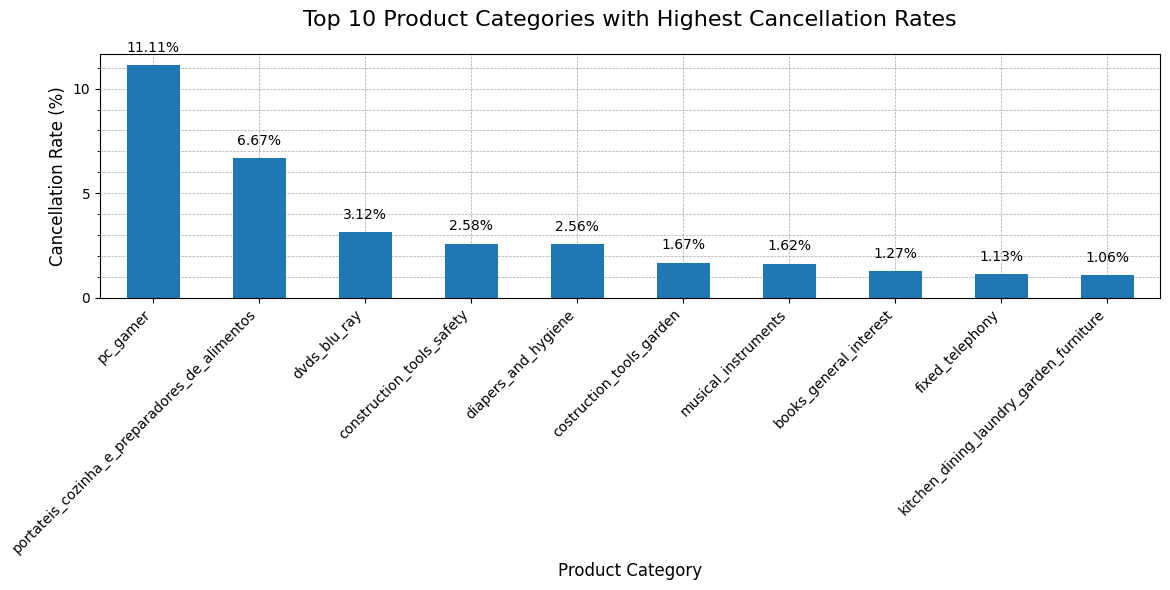

In [373]:
canceled_by_category = (
    all_df[all_df["order_status"] == "canceled"].groupby("product_category_name").size()
)
total_by_category = all_df.groupby("product_category_name").size()

cancellation_rate = (
    (canceled_by_category / total_by_category * 100)
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
ax = cancellation_rate.plot(kind="bar")

plt.title(
    "Top 10 Product Categories with Highest Cancellation Rates", fontsize=16, pad=20
)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Cancellation Rate (%)", fontsize=12)

plt.xticks(rotation=45, ha="right")

ax.grid(
    True,
    which="both",
    axis="both",
    linestyle="--",
    linewidth=0.5,
    color="gray",
    alpha=0.7,
)
ax.set_axisbelow(True)

ax.yaxis.set_major_locator(plt.MultipleLocator(5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

for i, v in enumerate(cancellation_rate):
    ax.text(i, v + 0.5, f"{v:.2f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

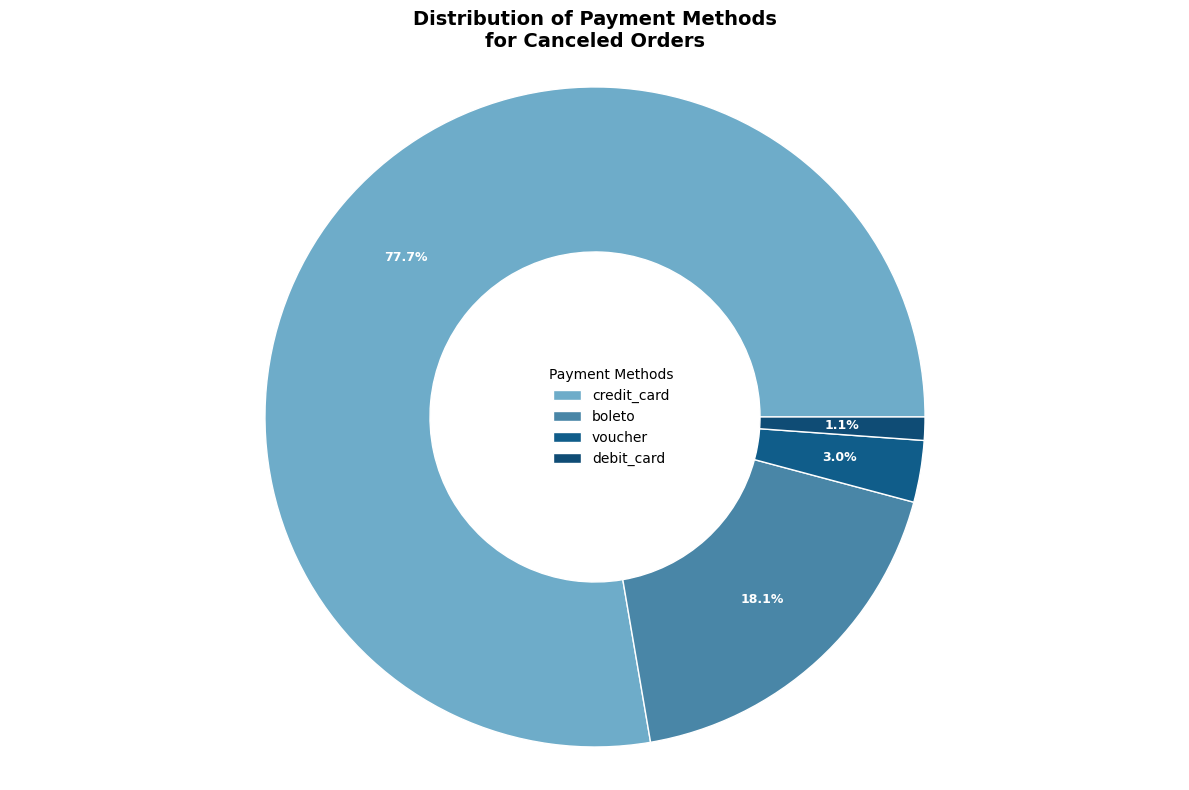

In [374]:
import matplotlib.pyplot as plt

canceled_payment_methods = all_df[all_df["order_status"] == "canceled"][
    "payment_type"
].value_counts()

plt.figure(figsize=(12, 8))


colors = [
    "#6EACC9",
    "#4986A7",
    "#105D8A",
    "#0F4C75",
]

patches, texts, autotexts = plt.pie(
    canceled_payment_methods,
    labels=[""] * len(canceled_payment_methods),
    colors=colors,
    autopct="%1.1f%%",
    pctdistance=0.75,
    wedgeprops=dict(width=0.5, edgecolor="white", linewidth=1),
)

plt.setp(autotexts, size=9, weight="bold", color="white")

legend = plt.legend(
    patches,
    canceled_payment_methods.index,
    title="Payment Methods",
    loc="center left",
    bbox_to_anchor=(0.45, 0.5),
    fontsize=10,
)
legend.get_frame().set_alpha(0.0)
legend.get_frame().set_facecolor("none")

plt.title(
    "Distribution of Payment Methods\nfor Canceled Orders",
    pad=5,
    size=14,
    weight="bold",
)

plt.axis("equal")

plt.tight_layout()

plt.show()

In [375]:
translated_df_copy = translated_df.copy()


def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text


translated_df_copy.loc[:, "cleaned_review"] = (
    translated_df_copy.loc[:, "review_comment_message"]
    .fillna("")
    .apply(preprocess_text)
)

word_freq = Counter(" ".join(translated_df_copy["cleaned_review"]).split())


def categorize_review(text):
    categories = {
        "Shipping Issue": [
            "ship",
            "delay",
            "send",
            "courier",
            "package",
            "deliver",
            "arrive",
            "receive",
            "expedition",
            "transport",
            "wait",
            "late",
            "come",
            "came",
            "slow",
        ],
        "Product Quality Issue": [
            "quality",
            "broken",
            "damaged",
            "defect",
            "different",
            "not working",
            "fake",
            "destroyed",
            "not functioning",
            "poor",
            "does not match",
            "like",
        ],
        "Customer Service Issue": [
            "service",
            "trust",
            "reliable",
            "invoice",
            "call",
            "error",
            "solve",
            "contact",
            "seller",
            "response",
            "customer",
            "ignore",
            "answer",
            "help",
            "support",
            "notified",
        ],
        "Stock Issue": [
            "stock",
            "unavailable",
            "empty",
            "not available",
        ],
        "App/Website Issue": [
            "app",
            "website",
            "error",
            "bug",
            "crash",
            "glitch",
        ],
        "Return/Refund Issue": [
            "return",
            "refund",
            "exchange",
            "replace",
            "money back",
            "send back",
            "exchange",
            "compensation",
        ],
        "Seller Cancellation": [
            "cancel",
            "void",
        ],
        "Positive Comment": [
            "good",
            "satisfied",
            "happy",
            "great",
            "awesome",
            "excellent",
            "ok",
            "nice",
            "wonderful",
            "amazing",
            "love",
            "easy",
            "delight",
        ],
    }

    for category, keywords in categories.items():
        if any(word in text for word in keywords):
            return category
    return "Other"


translated_df_copy.loc[:, "Category"] = translated_df_copy.loc[
    :, "cleaned_review"
].apply(categorize_review)

category_counts = Counter(translated_df_copy["Category"])
sorted_categories = sorted(category_counts.items(), key=lambda x: x[1], reverse=True)

total_reviews = sum(category_counts.values())

for category, count in sorted_categories:
    percentage = (count / total_reviews) * 100

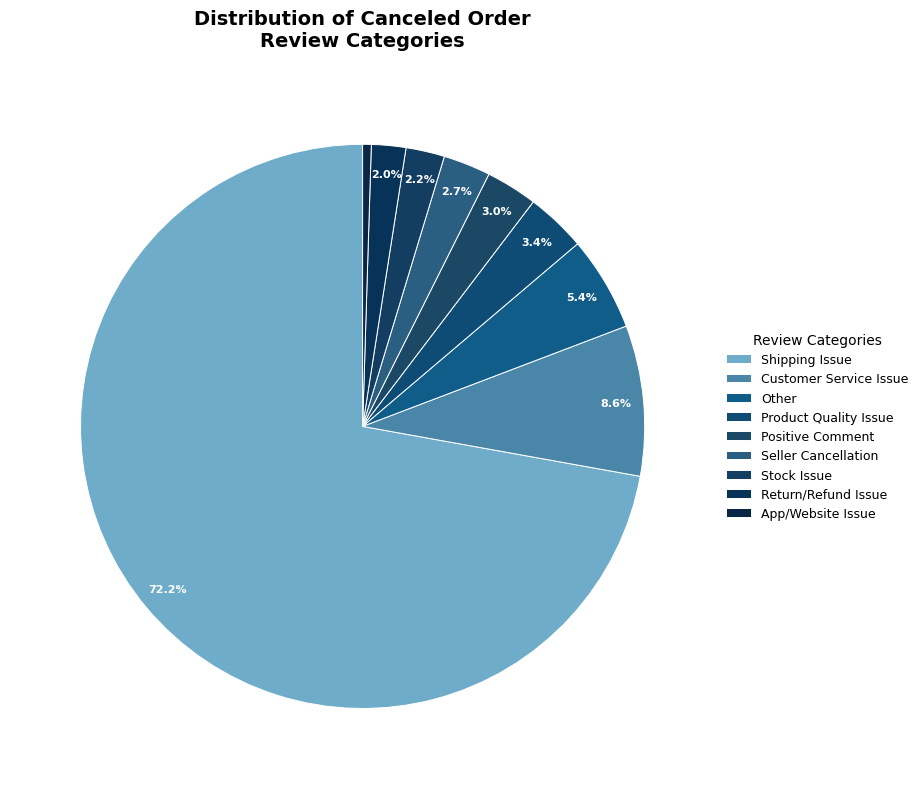

In [376]:
df = pd.DataFrame(sorted_categories, columns=["Category", "Count"])
df["Percentage"] = df["Count"] / total_reviews * 100

plt.figure(figsize=(12, 8))

colors = [
    "#6EACC9",
    "#4986A7",
    "#105D8A",
    "#0F4C75",
    "#1B4965",
    "#2B5F82",
    "#133E62",
    "#083358",
    "#0A2647",
    "#001B48",
]

patches, texts, autotexts = plt.pie(
    df["Percentage"],
    labels=[""] * len(df),
    colors=colors,
    autopct=lambda pct: f"{pct:.1f}%" if pct > 1 else "",
    startangle=90,
    pctdistance=0.9,
    wedgeprops={"linewidth": 0.7, "edgecolor": "white"},
)

for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(8)
    autotext.set_weight("bold")

legend = plt.legend(
    patches,
    df["Category"],
    title="Review Categories",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=9,
)
legend.get_frame().set_alpha(0.0)
legend.get_frame().set_facecolor("none")

plt.title(
    "Distribution of Canceled Order\nReview Categories", pad=20, size=14, weight="bold"
)

plt.tight_layout()

plt.show()

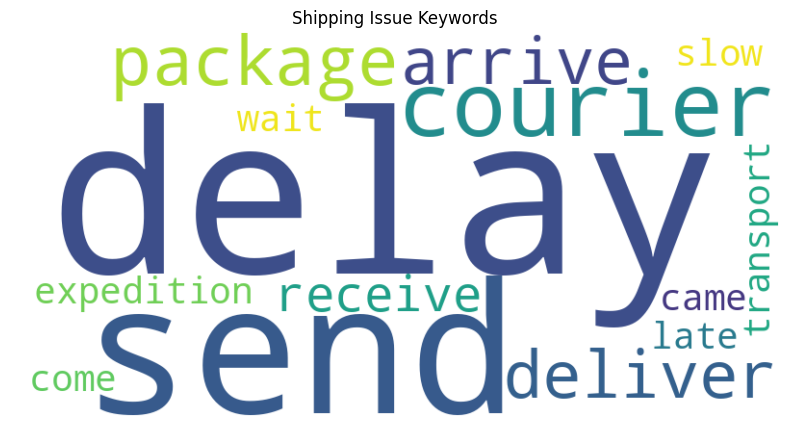

In [377]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(
        text
    )

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


shipping_keywords = " ".join(
    [
        # "ship",
        "delay",
        "send",
        "courier",
        "package",
        "deliver",
        "arrive",
        "receive",
        "expedition",
        "transport",
        "wait",
        "late",
        "come",
        "came",
        "slow",
    ]
)

create_wordcloud(shipping_keywords, "Shipping Issue Keywords")

**Insight:**

- Kategori produk teknologi tinggi seperti "PC Gamer" memimpin dalam tingkat pembatalan, mencapai **11.11%**, diikuti oleh "alat masak" dan "peralatan audio/video".
- Produk-produk dengan **spesifikasi teknis yang kompleks** atau **harga tinggi** cenderung lebih rentan terhadap pembatalan.
- Dari sisi pembayaran, "kartu kredit" mendominasi metode yang digunakan dalam pesanan yang dibatalkan, mencakup **77.7%** dari total. Hal ini bisa saja mencerminkan **kemudahan pembatalan** dan **kecenderungan pembelian impulsif** dengan kartu kredit.
- Faktor yang paling signifikan dalam pembatalan pesanan adalah **masalah pengiriman**, yang menyumbang **72.17%** dari alasan pembatalan berdasarkan ulasan pelanggan. Diikuti oleh **masalah layanan pelanggan (8.62%)** dan **kualitas produk (3.45%)**.
- Kata paling sering yang muncul dalam masalah pengiriman adalah **"delay"**, yang menunjukkan bahwa masalah pengiriman disebabkan oleh **keterlambatan**.

### Bagaimana pengaruh interval pengiriman terhadap tingkat kepuasan pelanggan?

In [378]:
prepared_df = order_orders_reviews_df.copy()

prepared_df["delivery_time"] = (
    pd.to_datetime(prepared_df["order_delivered_customer_date"])
    - pd.to_datetime(prepared_df["order_purchase_timestamp"])
).dt.total_seconds() / (24 * 3600)

prepared_df = prepared_df[prepared_df["delivery_time"] >= 0]

prepared_df["delivery_interval"] = pd.cut(
    prepared_df["delivery_time"],
    bins=[0, 1, 2, 3, 5, 7, 10, 15, 30, 60, np.inf],
    labels=[
        "0-1",
        "1-2",
        "2-3",
        "3-5",
        "5-7",
        "7-10",
        "10-15",
        "15-30",
        "30-60",
        "60+",
    ],
)

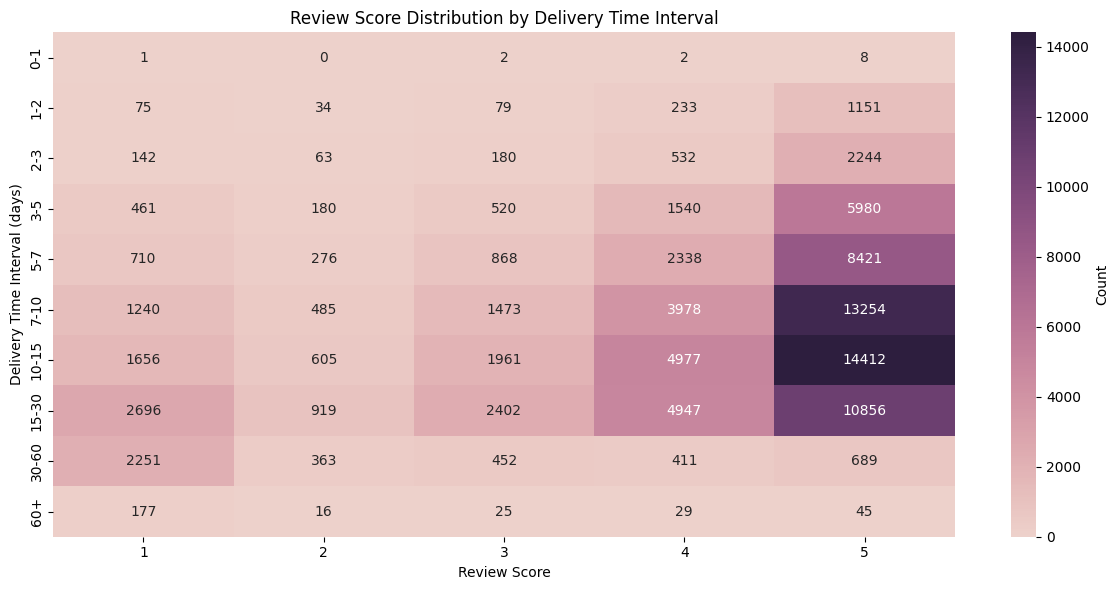

In [379]:
plt.figure(figsize=(12, 6))

data_matrix = prepared_df.pivot_table(
    index="delivery_interval",
    columns="review_score",
    aggfunc="size",
    fill_value=0,
    observed=False,
)
sns.heatmap(
    data_matrix,
    cmap=sns.cubehelix_palette(as_cmap=True),
    annot=True,
    fmt="d",
    cbar_kws={"label": "Count"},
)

plt.title("Review Score Distribution by Delivery Time Interval")
plt.xlabel("Review Score")
plt.ylabel("Delivery Time Interval (days)")

plt.tight_layout()
plt.show()

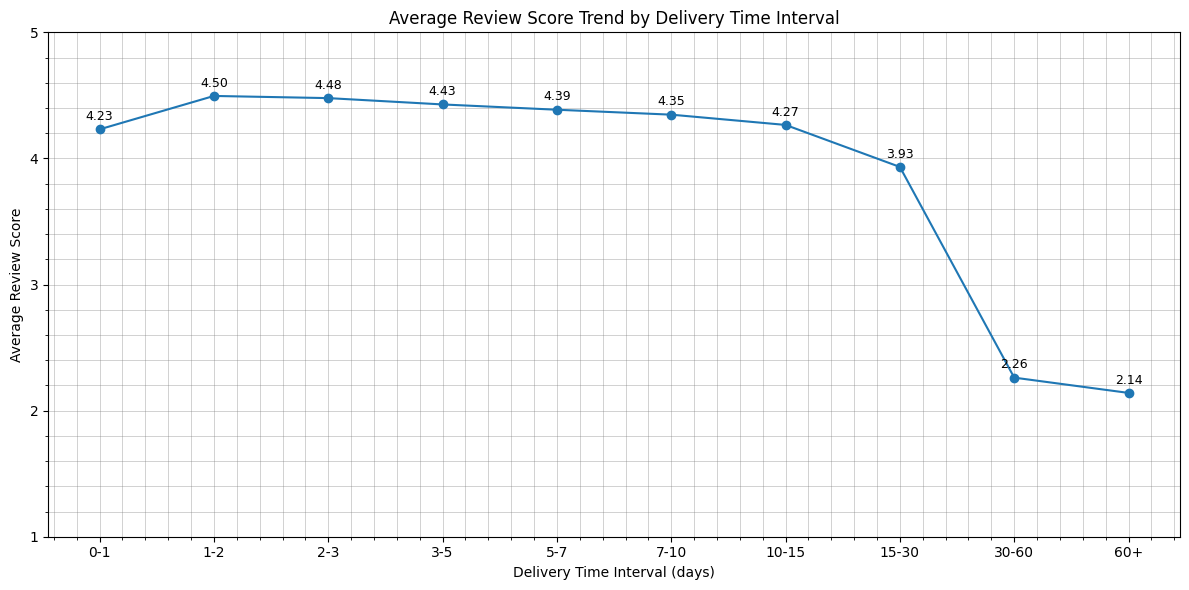

In [380]:
category_order = sorted(prepared_df["delivery_interval"].unique())

if not isinstance(prepared_df["delivery_interval"].dtype, pd.CategoricalDtype):
    prepared_df["delivery_interval"] = pd.Categorical(
        prepared_df["delivery_interval"], categories=category_order, ordered=True
    )

avg_scores = (
    prepared_df.groupby("delivery_interval", observed=False)["review_score"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))
plt.plot(avg_scores["delivery_interval"], avg_scores["review_score"], marker="o")
plt.title("Average Review Score Trend by Delivery Time Interval")
plt.xlabel("Delivery Time Interval (days)")
plt.ylabel("Average Review Score")
plt.ylim(1, 5)

plt.grid(
    visible=True, which="both", linestyle="-", linewidth=0.5, color="gray", alpha=0.5
)
plt.yticks([1, 2, 3, 4, 5])
plt.minorticks_on()

for i, row in avg_scores.iterrows():
    plt.text(
        row["delivery_interval"],
        row["review_score"] + 0.05,
        f"{row['review_score']:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.tight_layout()

plt.show()

**Insight:**

- **Kecepatan pengiriman** memiliki **dampak signifikan** terhadap **kepuasan pelanggan**.
    - **Pengiriman yang lebih cepat** cenderung menghasilkan **ulasan yang lebih positif**.
    - **Skor ulasan rata-rata tertinggi (4,50)** dicapai untuk **pengiriman yang diselesaikan dalam 1-2 hari**.
- Terdapat **penurunan bertahap** dalam **skor ulasan seiring** bertambahnya **waktu pengiriman**.
    - Penurunan drastis terlihat untuk pengiriman yang memakan waktu lebih dari 15 hari.
- **Pengiriman yang sangat lama (30-60 dan 60+ hari)** menerima **skor ulasan terendah**.
    - Skor rata-rata hanya **2,26** untuk pengiriman **30-60 hari**.
    - Skor rata-rata bahkan lebih rendah, yaitu **2,14**, untuk pengiriman yang memakan waktu **lebih dari 60 hari**.

### Kategori produk apa yang paling populer berdasarkan jumlah ulasan?

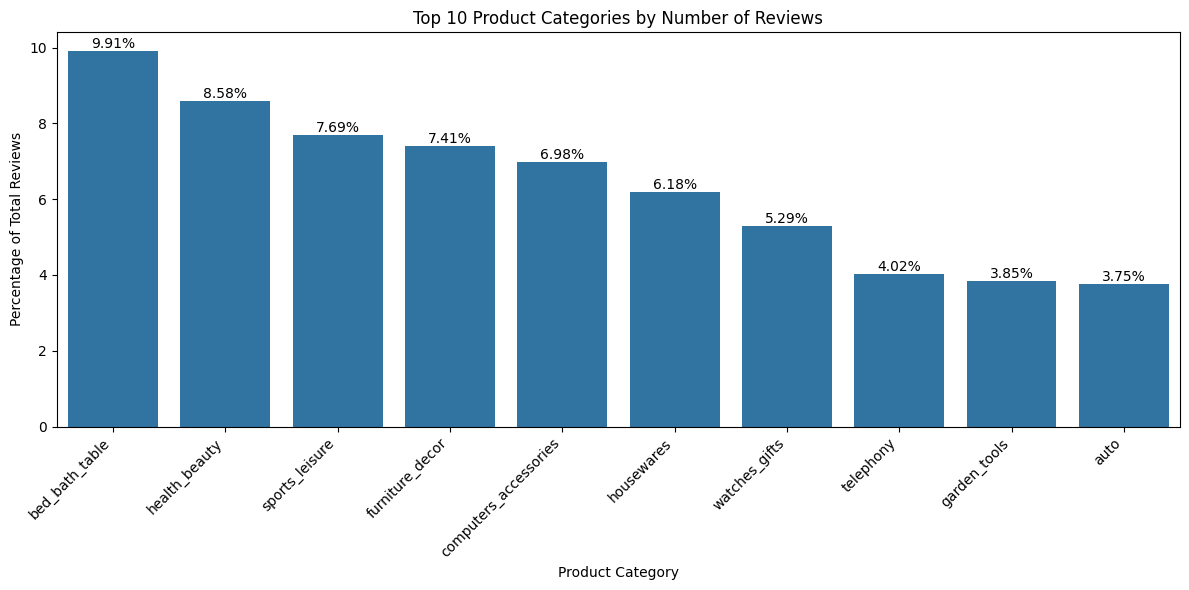

In [381]:
category_reviews = (
    all_df.groupby("product_category_name")["review_id"]
    .count()
    .sort_values(ascending=False)
)
total_reviews = category_reviews.sum()
category_reviews_percent = (category_reviews / total_reviews * 100).round(2)
top_10 = category_reviews_percent.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10.index, y=top_10.values)
plt.title("Top 10 Product Categories by Number of Reviews")
plt.xlabel("Product Category")
plt.ylabel("Percentage of Total Reviews")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(top_10.values):
    plt.text(i, v, f"{v}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()

**Insight:**

- Kategori **bed_bath_table** adalah yang **paling populer**, menyumbang **9,91%** dari total ulasan.
- **Lima kategori teratas menyumbang hampir 40%** dari seluruh ulasan.
- Kategori-kategori terkait gaya hidup dan perawatan diri (**bed_bath_table, health_beauty, sports_leisure**) mendominasi **tiga posisi teratas**, menunjukkan **fokus konsumen pada kenyamanan dan kesehatan**.

### Bagaimana performa berbagai kategori produk dalam hal kepuasan pelanggan?

In [382]:
category_reviews_df = (
    oor_oip_df.groupby("product_category_name")
    .agg({"review_id": "count", "review_score": "mean"})
    .rename(columns={"review_id": "Review Count", "review_score": "Average Rating"})
    .sort_values("Review Count", ascending=False)
)

total_reviews = category_reviews_df["Review Count"].sum()
category_reviews_df["Percentage"] = (
    category_reviews_df["Review Count"] / total_reviews * 100
).map("{:.2f}%".format)
category_reviews_df["Average Rating"] = category_reviews_df["Average Rating"].round(2)

category_reviews_df

,Review Count,Average Rating,Percentage
product_category_name,,,
bed_bath_table,11137,3.9,9.91%
health_beauty,9645,4.14,8.58%
sports_leisure,8640,4.11,7.69%
furniture_decor,8331,3.9,7.41%
computers_accessories,7849,3.93,6.98%
...,...,...,...
cds_dvds_musicals,14,4.64,0.01%
la_cuisine,13,4.0,0.01%
pc_gamer,9,3.33,0.01%


Dalam menentukan **Best Seller** berdasarkan 5 produk terlaris dapat menggunakan pendekatan ***Bayesian Average Rating***. Metode ini memanfaatkan rumus Bayes untuk mengkalkulasi peringkat yang lebih berimbang. Penghitungannya mempertimbangkan beberapa faktor daiantaranya banyaknya ulasan per produk, nilai rata-rata tiap produk, serta rata-rata penilaian secara menyeluruh.\
Metode ini memberikan penilaian yang lebih tepat, terutama untuk produk-produk dengan jumlah ulasan yang relatif sedikit. Dengan demikian, mendapatkan gambaran yang lebih akurat tentang kualitas dan popularitas produk, tanpa terlalu dipengaruhi oleh perbedaan jumlah ulasan antar produk.

$$
\text{Bayesian Average Rating} = \frac{v \cdot R + m \cdot C}{v + m}
$$

Dimana:\
**_v_** = Jumlah ulasan untuk produk tersebut\
**_R_** = Peringkat rata-rata produk\
**_C_** = Peringkat rata-rata keseluruhan di semua produk\
**_m_** = Jumlah minimum ulasan yang diperlukan agar produk dapat dipertimbangkan

In [383]:
C = category_reviews_df["Average Rating"].mean()

m = category_reviews_df["Review Count"].quantile(0.75)

top_5_products = category_reviews_df.head(5).index.tolist()
bayesian_ratings = (
    (
        category_reviews_df.loc[top_5_products, "Review Count"]
        * category_reviews_df.loc[top_5_products, "Average Rating"]
        + m * C
    )
    / (category_reviews_df.loc[top_5_products, "Review Count"] + m)
).round(2)

pd.DataFrame(
    {
        # "product_category_name": top_5_products,
        # "Review Count": category_reviews_df.loc[top_5_products, "Review Count"],
        # "Average Rating": category_reviews_df.loc[top_5_products, "Average Rating"],
        # "Percentage": category_reviews_df.loc[top_5_products, "Percentage"],
        "Bayesian Average Rating": bayesian_ratings,
    }
).sort_values(by="Bayesian Average Rating", ascending=False)

,Bayesian Average Rating
product_category_name,
health_beauty,4.12
sports_leisure,4.1
computers_accessories,3.95
bed_bath_table,3.92
furniture_decor,3.92


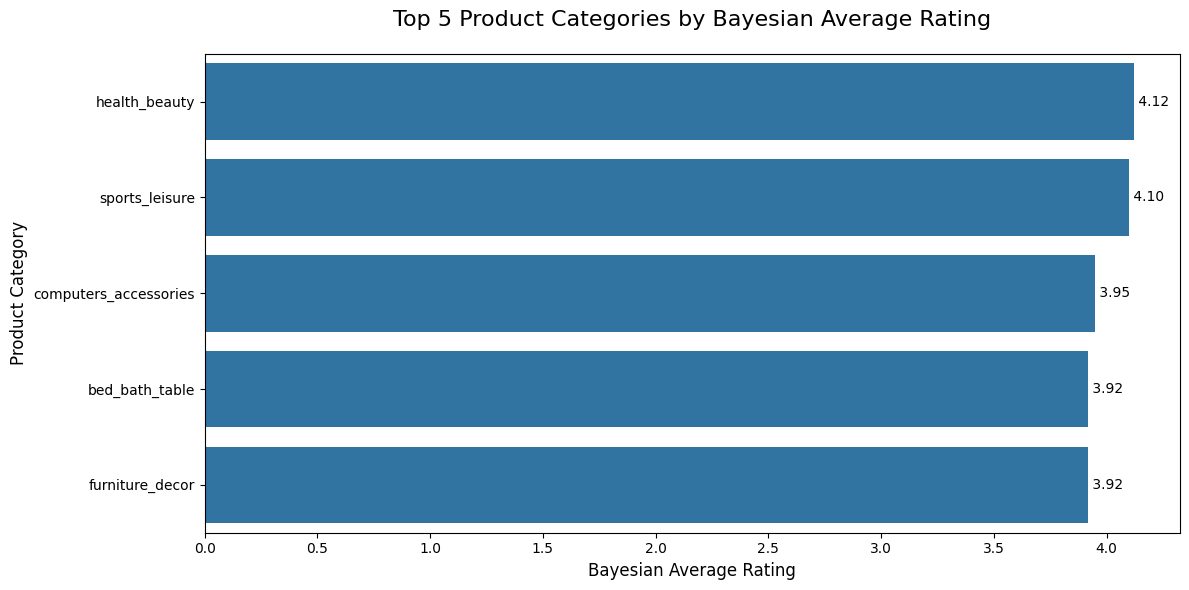

In [384]:
bayesian_ratings_df = pd.DataFrame(
    {
        "product_category_name": top_5_products,
        "Bayesian Average Rating": bayesian_ratings,
    }
).sort_values(by="Bayesian Average Rating", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Bayesian Average Rating", y="product_category_name", data=bayesian_ratings_df
)

plt.title("Top 5 Product Categories by Bayesian Average Rating", fontsize=16, pad=20)
plt.xlabel("Bayesian Average Rating", fontsize=12)
plt.ylabel("Product Category", fontsize=12)

for i, v in enumerate(bayesian_ratings_df["Bayesian Average Rating"]):
    plt.text(v, i, f" {v:.2f}", va="center", fontsize=10)

plt.tight_layout()
plt.show()

**Insight:**

- Kategori **health_beauty** memiliki performa terbaik dengan Bayesian Average Rating **4.12**, diikuti oleh **sports_leisure** dengan **4.10**.
- Perbedaan rating antar kategori teratas relatif kecil (range 0.2), menunjukkan **konsistensi kualitas** di berbagai kategori produk populer.

### Bagaimana tren penjualan bulanan?

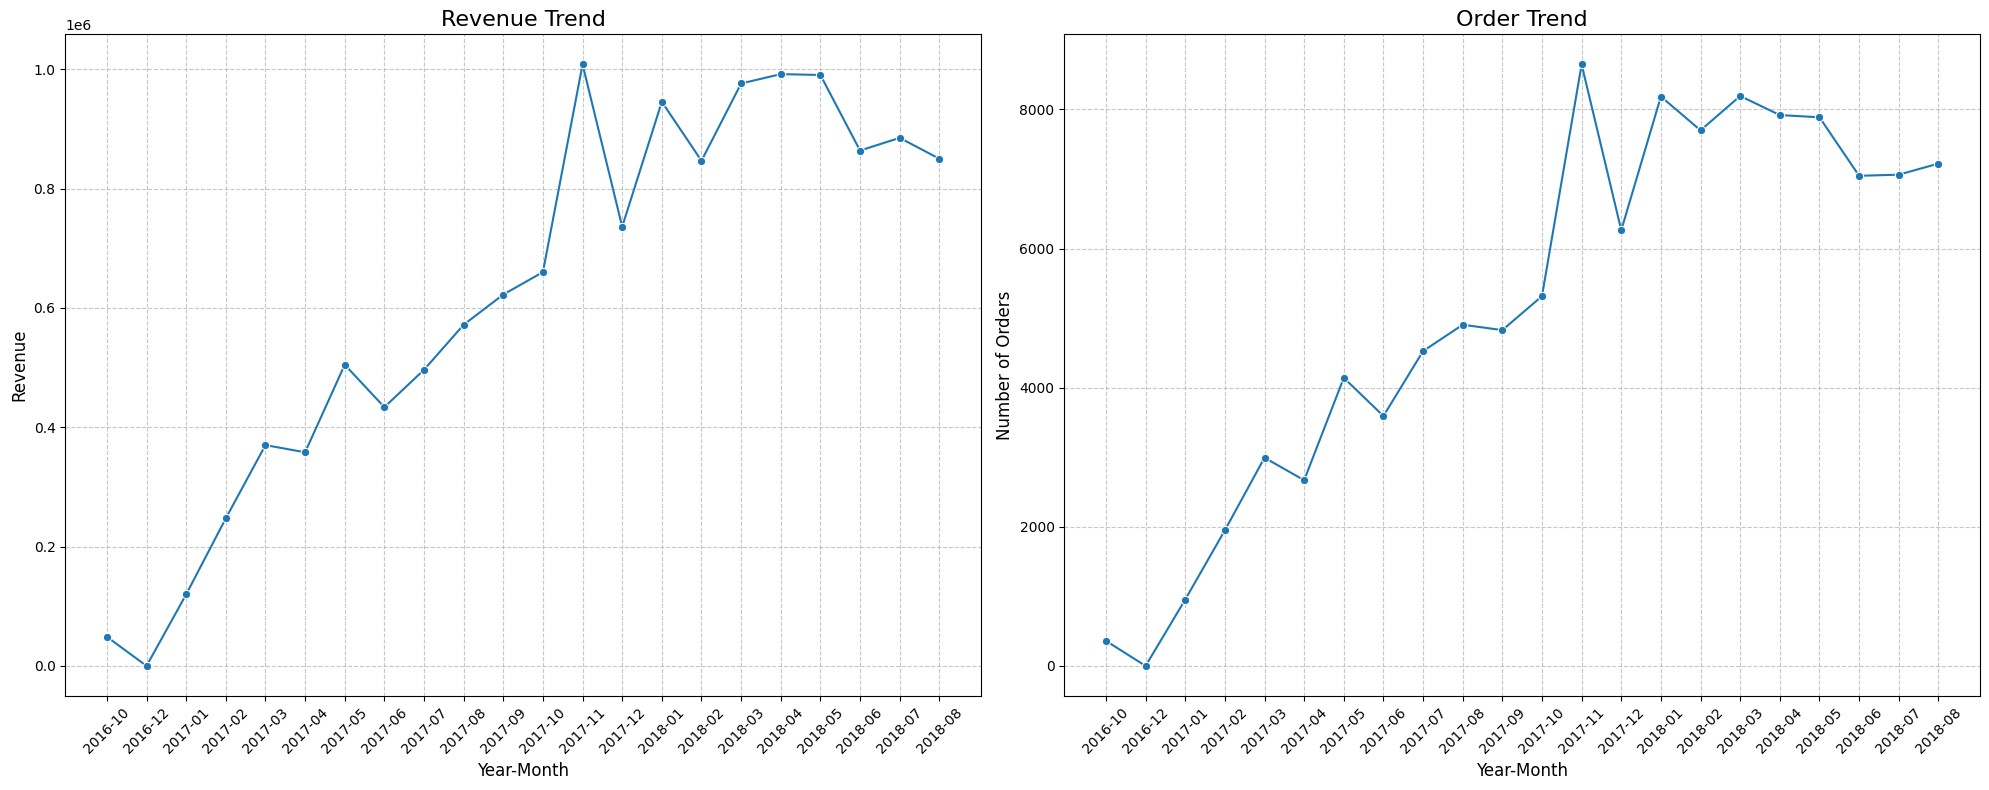


Top 3 months by revenue:
   year_month       price
12    2017-11  1008127.73
17    2018-04   991830.11
18    2018-05   990416.65

Top 3 months by number of orders:
   year_month  order_id
12    2017-11      8647
16    2018-03      8193
14    2018-01      8185


In [385]:
all_df["order_date"] = pd.to_datetime(all_df["order_purchase_timestamp"])

all_df["year_month"] = all_df["order_date"].dt.to_period("M")

start_date = pd.Period("2016-10")
end_date = pd.Period("2018-08")
df_filtered = all_df[
    (all_df["year_month"] >= start_date) & (all_df["year_month"] <= end_date)
]

monthly_data = (
    df_filtered.groupby("year_month")
    .agg({"price": "sum", "order_id": "count"})
    .reset_index()
)

monthly_data["year_month"] = monthly_data["year_month"].astype(str)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.lineplot(x="year_month", y="price", data=monthly_data, ax=ax1, marker="o")
ax1.set_title("Revenue Trend", fontsize=16)
ax1.set_xlabel("Year-Month", fontsize=12)
ax1.set_ylabel("Revenue", fontsize=12)
ax1.tick_params(axis="x", rotation=45)
ax1.grid(True, linestyle="--", alpha=0.7)

sns.lineplot(x="year_month", y="order_id", data=monthly_data, ax=ax2, marker="o")
ax2.set_title("Order Trend", fontsize=16)
ax2.set_xlabel("Year-Month", fontsize=12)
ax2.set_ylabel("Number of Orders", fontsize=12)
ax2.tick_params(axis="x", rotation=45)
ax2.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()

plt.show()

top_months_revenue = monthly_data.nlargest(3, "price")
print("\nTop 3 months by revenue:")
print(top_months_revenue[["year_month", "price"]])

top_months_orders = monthly_data.nlargest(3, "order_id")
print("\nTop 3 months by number of orders:")
print(top_months_orders[["year_month", "order_id"]])

**Insight:**

- Terlihat **lonjakan tajam** pada bulan **November 2017** untuk kedua metrik. Ini menjadi bulan dengan performa tertinggi, baik dari segi **revenue (1,008,127.73)** maupun **jumlah pesanan (8,647)**.
- **Lonjakan di bulan November 2017** sangat mungkin berkaitan dengan **event Black Friday**. Di Brasil, Black Friday biasanya **jatuh pada akhir November**, sama seperti di AS. 
- Setelah lonjakan November 2017, bisnis tampaknya mampu mempertahankan level penjualan yang lebih tinggi di bulan-bulan berikutnya dibandingkan periode sebelum November 2017.

## RFM Analysis

In [386]:
end_date = pd.to_datetime(all_df["order_purchase_timestamp"]).max()

rfm = all_df.groupby("customer_id").agg(
    {
        "order_purchase_timestamp": lambda x: (end_date - pd.to_datetime(x.max())).days,
        "order_id": "count",
        "price": "sum",
    }
)

rfm.columns = ["Recency", "Frequency", "Monetary"]


def create_quartiles(series, labels):
    try:
        return pd.qcut(series, q=4, labels=labels, duplicates="drop")
    except ValueError:
        median = series.median()
        return pd.cut(
            series, bins=[-np.inf, median, np.inf], labels=[labels[0], labels[-1]]
        )


r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

rfm["R"] = create_quartiles(rfm["Recency"], r_labels)
rfm["F"] = create_quartiles(rfm["Frequency"], f_labels)
rfm["M"] = create_quartiles(rfm["Monetary"], m_labels)

rfm["RFM_Score"] = rfm["R"].astype(str) + rfm["F"].astype(str) + rfm["M"].astype(str)

rfm_result = rfm

rfm_result.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Score
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,292,1,89.80,2,1,3,213
000161a058600d5901f007fab4c27140,413,1,54.90,1,1,2,112
0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,1,1,4,114
0002414f95344307404f0ace7a26f1d5,382,1,149.90,1,1,3,113
000379cdec625522490c315e70c7a9fb,153,1,93.00,3,1,3,313
0004164d20a9e969af783496f3408652,509,1,59.99,1,1,2,112
000419c5494106c306a97b5635748086,184,1,34.30,3,1,1,311
00046a560d407e99b969756e0b10f282,258,1,120.90,2,1,3,213
00050bf6e01e69d5c0fd612f1bcfb69c,350,1,69.99,2,1,2,212


In [387]:
rfm_result.describe()

,Recency,Frequency,Monetary
count,97917.000000,97917.000000,97917.00000
mean,244.660692,1.147625,138.14991
std,153.420856,0.550329,210.20894
min,0.000000,1.000000,0.85000
25%,120.000000,1.000000,45.93000
50%,226.000000,1.000000,87.00000
75%,355.000000,1.000000,149.94000
max,728.000000,22.000000,13440.00000


In [388]:
rfm_result["RFM_Score"].value_counts()

RFM_Score
111    5971
311    5919
411    5892
212    5833
211    5703
313    5625
412    5622
312    5597
112    5563
413    5559
213    5300
113    5239
214    5040
114    4992
414    4991
314    4912
344    1195
244    1161
444    1099
144    1084
243     739
343     716
143     645
443     618
142     518
242     484
442     472
342     433
141     284
341     256
441     230
241     225
Name: count, dtype: int64

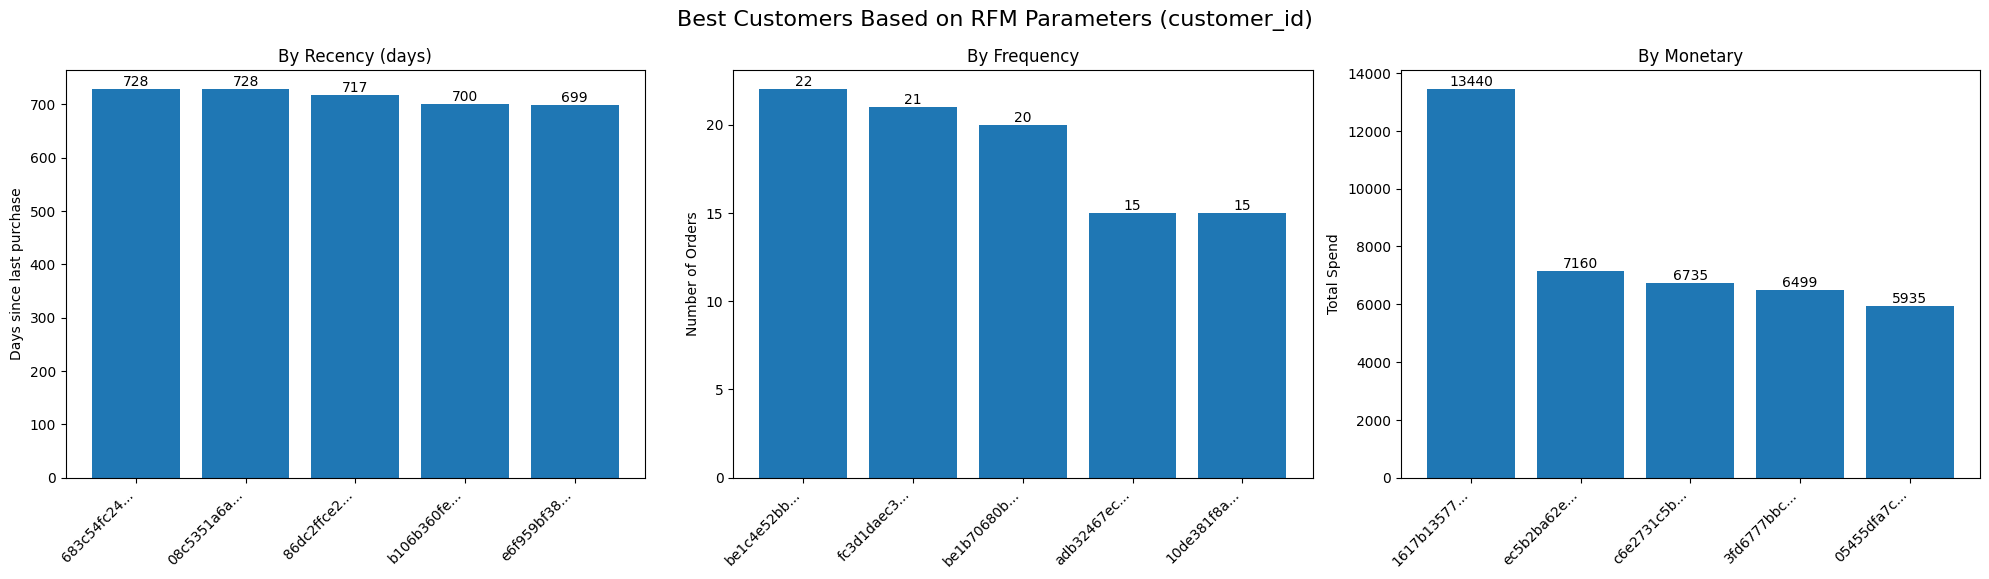

In [389]:
recency_df = rfm_result.sort_values("Recency", ascending=False).head()
frequency_df = rfm_result.sort_values("Frequency", ascending=False).head()
monetary_df = rfm_result.sort_values("Monetary", ascending=False).head()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle("Best Customers Based on RFM Parameters (customer_id)", fontsize=16)


def truncate_id(cust_id, max_length=10):
    return (
        str(cust_id)[:max_length] + "..."
        if len(str(cust_id)) > max_length
        else str(cust_id)
    )


ax1.bar(range(len(recency_df)), recency_df["Recency"])
ax1.set_title("By Recency (days)")
ax1.set_ylabel("Days since last purchase")
ax1.set_xticks(range(len(recency_df)))
ax1.set_xticklabels(
    [truncate_id(id) for id in recency_df.index], rotation=45, ha="right"
)

for i, v in enumerate(recency_df["Recency"]):
    ax1.text(i, v, f"{v:.0f}", ha="center", va="bottom")

ax2.bar(range(len(frequency_df)), frequency_df["Frequency"])
ax2.set_title("By Frequency")
ax2.set_ylabel("Number of Orders")
ax2.set_xticks(range(len(frequency_df)))
ax2.set_xticklabels(
    [truncate_id(id) for id in frequency_df.index], rotation=45, ha="right"
)

for i, v in enumerate(frequency_df["Frequency"]):
    ax2.text(i, v, f"{v:.0f}", ha="center", va="bottom")

ax3.bar(range(len(monetary_df)), monetary_df["Monetary"])
ax3.set_title("By Monetary")
ax3.set_ylabel("Total Spend")
ax3.set_xticks(range(len(monetary_df)))
ax3.set_xticklabels(
    [truncate_id(id) for id in monetary_df.index], rotation=45, ha="right"
)

for i, v in enumerate(monetary_df["Monetary"]):
    ax3.text(i, v, f"{v:.0f}", ha="center", va="bottom")

plt.tight_layout()
plt.subplots_adjust(top=0.88, bottom=0.2)
plt.show()

#### Segmentasi pelanggan

In [390]:
def rfm_segment(score):
    score = int(score)
    r, f, m = score // 100, (score % 100) // 10, score % 10
    
    if r >= 4 and f >= 1 and m >= 4:
        return 'Top customers'
    elif r >= 3 and f >= 1 and m >= 3:
        return 'High value customer'
    elif r >= 2 and f >= 1 and m >= 2:
        return 'Medium value customer'
    elif r >= 2 and f >= 1 and m >= 1:
        return 'Low value customers'
    else:
        return 'Lost customers'

rfm_result['customer_segment'] = rfm_result['RFM_Score'].apply(rfm_segment)

print(rfm_result[['RFM_Score', 'customer_segment']].head(20))

                                 RFM_Score       customer_segment
customer_id                                                      
00012a2ce6f8dcda20d059ce98491703       213  Medium value customer
000161a058600d5901f007fab4c27140       112         Lost customers
0001fd6190edaaf884bcaf3d49edf079       114         Lost customers
0002414f95344307404f0ace7a26f1d5       113         Lost customers
000379cdec625522490c315e70c7a9fb       313    High value customer
0004164d20a9e969af783496f3408652       112         Lost customers
000419c5494106c306a97b5635748086       311    Low value customers
00046a560d407e99b969756e0b10f282       213  Medium value customer
00050bf6e01e69d5c0fd612f1bcfb69c       212  Medium value customer
000598caf2ef4117407665ac33275130       414          Top customers
0005aefbb696d34b3424dccd0a0e9fd0       413    High value customer
00062b33cb9f6fe976afdcff967ea74d       112         Lost customers
00066ccbe787a588c52bd5ff404590e3       344    High value customer
00072d033f

In [391]:
customer_segment_df = rfm_result['customer_segment'].value_counts().reset_index()
customer_segment_df.columns = ['customer_segment', 'customer_count']
print(customer_segment_df)

        customer_segment  customer_count
0  Medium value customer           30681
1         Lost customers           24296
2    High value customer           18625
3    Low value customers           18225
4          Top customers            6090


In [392]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "Lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

customer_segment_df = customer_segment_df.sort_values('customer_segment')

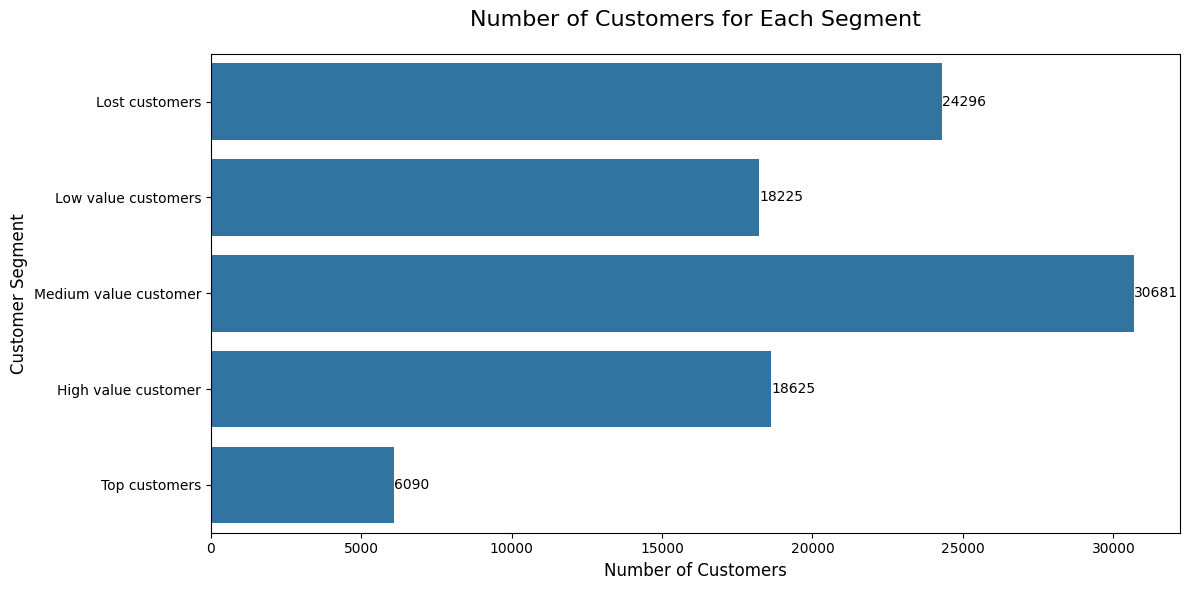

In [393]:
plt.figure(figsize=(12, 6))
sns.barplot(x="customer_count", y="customer_segment", data=customer_segment_df)
plt.title("Number of Customers for Each Segment", loc="center", fontsize=16, pad=20)
plt.ylabel("Customer Segment", fontsize=12)
plt.xlabel("Number of Customers", fontsize=12)
plt.tick_params(axis="both", which="major", labelsize=10)

for i, v in enumerate(customer_segment_df["customer_count"]):
    plt.text(v + 0.5, i, str(v), va="center")

plt.tight_layout()
plt.show()

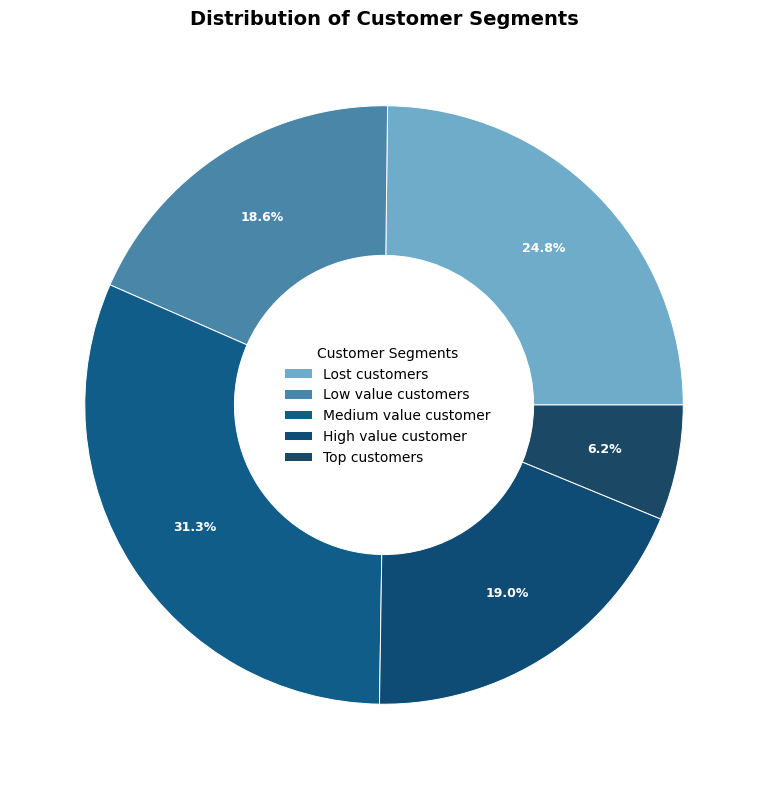

In [394]:
total_customers = customer_segment_df["customer_count"].sum()
customer_segment_df["percentage"] = (
    customer_segment_df["customer_count"] / total_customers * 100
)

plt.figure(figsize=(12, 8))

sea_colors = [
    "#6EACC9",
    "#4986A7",
    "#105D8A",
    "#0F4C75",
    "#1B4965",
]

patches, texts, autotexts = plt.pie(
    customer_segment_df["percentage"],
    labels=[""] * len(customer_segment_df),
    colors=sea_colors[: len(customer_segment_df)],
    autopct="%1.1f%%",
    pctdistance=0.75,
    wedgeprops=dict(width=0.5, edgecolor="white", linewidth=0.7),
)

plt.setp(autotexts, size=9, weight="bold", color="white")

legend = plt.legend(
    patches,
    customer_segment_df["customer_segment"],
    title="Customer Segments",
    loc="center left",
    bbox_to_anchor=(0.35, 0.5),
    fontsize=10,
)
legend.get_frame().set_alpha(0.0)
legend.get_frame().set_facecolor("none")

plt.title("Distribution of Customer Segments", pad=5, size=14, weight="bold")

plt.tight_layout()

plt.show()

**Insight:**

- Recency:
    - 5 pelanggan teratas memiliki rentang recency antara 699-728 hari sejak pembelian terakhir.
    - Perbedaan recency antar pelanggan top 5 relatif kecil, hanya berkisar 29 hari.
    - **Menunjukkan bahwa pelanggan-pelanggan ini belum melakukan pembelian dalam waktu yang cukup lama (sekitar 2 tahun).**
- Frequency:
    - **Pelanggan teratas melakukan 22 kali pembelian.**
    - Frekuensi pembelian menurun secara bertahap dari 22 ke 15 untuk 5 pelanggan teratas.
    - Perbedaan frekuensi pembelian cukup signifikan antara pelanggan teratas (22) dan kelima (15).
- Monetary:
    - **Pelanggan teratas memiliki total belanja sebesar 13,440** (dalam satuan mata uang).
    - **Terdapat penurunan yang cukup drastis antara pelanggan teratas (13,440) dengan pelanggan kedua (7,160)**.
    - Nilai belanja menurun secara bertahap dari pelanggan kedua hingga kelima.

- Customer Segmentation:
    - **Medium value customer** merupakan **segmen pelanggan terbesar** dengan **30,681 pelanggan (31.3% dari total pelanggan)**. Ini menunjukkan bahwa sebagian besar pelanggan memiliki nilai transaksi yang moderat.
    - **Lost customers** adalah **segmen terbesar kedua** dengan **24,296 pelanggan (24.8%)**. Ini mengindikasikan bahwa hampir seperempat pelanggan telah berhenti melakukan transaksi.
    - **Low value customers** terdiri dari **18,225 pelanggan (18.6%)**. Pelanggan ini berpotensi untuk ditingkatkan nilainya melalui program retensi atau promosi yang tepat.
    - **Top customers** hanya mencakup **6.2% dari total pelanggan** dengan 6,090 pelanggan. Segmen ini sangat penting karena kontribusinya yang tinggi terhadap pendapatan, meskipun jumlahnya relatif kecil.


## Conclusion


1. Apa faktor utama yang menyebabkan pembatalan pesanan?\
Faktor utama yang menyebabkan pembatalan pesanan adalah masalah pengiriman, yang mencakup 72.17% dari total alasan pembatalan. Keterlambatan pengiriman merupakan penyebab terbesar, dengan kata "delay" muncul paling sering dalam ulasan pelanggan. Selain itu, produk dengan spesifikasi teknis yang kompleks dan harga tinggi seperti "PC Gamer" juga lebih rentan dibatalkan, serta metode pembayaran dengan kartu kredit lebih sering digunakan dalam pesanan yang dibatalkan (77.7%), yang mungkin terkait dengan kemudahan pembatalan dan perilaku pembelian impulsif.

2. Bagaimana pengaruh interval pengiriman terhadap tingkat kepuasan pelanggan?\
Kecepatan pengiriman memiliki dampak yang signifikan terhadap kepuasan pelanggan. Pengiriman cepat (1-2 hari) menghasilkan ulasan dengan skor rata-rata tertinggi 4.50, sementara pengiriman yang memakan waktu lebih lama menyebabkan penurunan skor secara bertahap. Pengiriman 30-60 hari hanya mendapat skor rata-rata 2.26, sedangkan pengiriman lebih dari 60 hari memperoleh skor lebih rendah lagi, yaitu 2.14. Ini menunjukkan bahwa pengiriman lambat memiliki korelasi kuat dengan ulasan negatif.

3. Kategori produk apa yang paling populer berdasarkan jumlah ulasan?\
Kategori bed_bath_table adalah yang paling populer, mencakup 9.91% dari total ulasan. Secara keseluruhan, lima kategori teratas (termasuk health_beauty dan sports_leisure) menyumbang hampir 40% dari total ulasan, menunjukkan bahwa konsumen sangat fokus pada produk-produk terkait kenyamanan dan kesehatan.

4. Bagaimana performa berbagai kategori produk dalam hal kepuasan pelanggan?\
Kategori health_beauty mencatat performa terbaik dalam hal kepuasan pelanggan dengan Bayesian Average Rating 4.12, diikuti oleh sports_leisure dengan 4.10. Perbedaan antar kategori teratas cukup kecil, mencerminkan konsistensi kualitas di berbagai kategori produk populer.

5. Bagaimana tren penjualan bulanan?\
Terdapat lonjakan signifikan dalam penjualan pada November 2017, baik dari sisi pendapatan (1,008,127.73 dalam mata uang Brazil) maupun jumlah pesanan (8,647), yang kemungkinan besar dipicu oleh event Black Friday. Setelah itu, level penjualan cenderung stabil dan lebih tinggi dibandingkan periode sebelum November 2017, menunjukkan dampak positif dari momentum Black Friday terhadap tren penjualan bisnis.